# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ ‚Ññ1

–í —ç—Ç–æ–º –¥–æ–º–∞—à–Ω–µ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π, –∞ —Ç–∞–∫–∂–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –≤–µ–±-—Å–µ—Ä–≤–∏—Å –¥–ª—è –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

> –û—Ü–µ–Ω–∫–∞ –∑–∞ –¥–æ–º–∞—à–∫—É = min(–≤–∞—à –±–∞–ª–ª, 10)


–ó–∞–¥–∞–Ω–∏—è, <font color='#9933CC'>–≤—ã–¥–µ–ª–µ–Ω–Ω—ã–µ —Ñ–∏–æ–ª–µ—Ç–æ–≤—ã–º</font>, —Ç—Ä–µ–±—É—é—Ç –æ—Ç –≤–∞—Å –Ω–∞–ø–∏—Å–∞–Ω–∏—è –∫–æ–¥–∞.

–ê –≤–æ–ø—Ä–æ—Å—ã, <font color='#FF6600'>–≤—ã–¥–µ–ª–µ–Ω–Ω—ã–µ –æ—Ä–∞–Ω–∂–µ–≤—ã–º</font>, —Ç–µ–∫—Å—Ç–æ–≤–æ–≥–æ –æ—Ç–≤–µ—Ç–∞.

–û—Ü–µ–Ω–∏–≤–∞—é—Ç—Å—è –∫–∞–∫ –∫–æ–¥, —Ç–∞–∫ –∏ –æ—Ç–≤–µ—Ç—ã –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã. –ï—Å–ª–∏ –Ω–µ—Ç –æ–¥–Ω–æ–≥–æ –∏/–∏–ª–∏ –¥—Ä—É–≥–æ–≥–æ, —Ç–æ —á–∞—Å—Ç—å –±–∞–ª–ª–æ–≤ –∑–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–µ –∑–∞–¥–∞–Ω–∏–µ –±–µ–∑ –∫–æ–ª–µ–±–∞–Ω–∏–π —Å–Ω–∏–º–∞–µ—Ç—Å—è.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from dataclasses import dataclass #because why not
import math
import re
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, make_scorer
from sklearn.linear_model import RidgeCV


random.seed(42)
np.random.seed(42)

In [2]:
@dataclass
class LinregAndEda:
    def remove_units(self: object, val: object):        
        #if we have empty value("") insert NaN for feature work with values
        try:
            return np.NaN if not str(val).split(' ')[0] else float(str(val).split(' ')[0])
        except:
            print(f'Problem with {val}')

    def process_units_torque(self: object, val: object):
        if isinstance(val, str) or not math.isnan(val):
            units = ['( )', 'rpm', 'nm@', '(kgm@ rpm)', 'kgm at', "@", 'nm', 'nm at', 'kgm', '/', 'at', '//', '(', ')']
            
            pattern = '|'.join(map(re.escape, units))
            #print(f'----------------------{val}::{type(val)}')
            # –ó–∞–º–µ–Ω–∏—Ç—å –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ –ø—É—Å—Ç—É—é —Å—Ç—Ä–æ–∫—É
            return re.sub(pattern, '', val.lower())
        
    def create_max_torque(self: object, val: object):
        try:
            if val is not None and isinstance(val, str):
                elements_to_split = ['-', '~', '+-']
                max_torque = val.split(' ')[1]
                if any(el in max_torque for el in elements_to_split):
                    split_pattern = '|'.join(map(re.escape, elements_to_split))
                    max_torque = re.split(split_pattern, max_torque)[1]
                return np.nan if max_torque == "" else float(max_torque.replace(',', '')) 
        except Exception as e:
            print(f'problem wth {val} || {e}')
            return np.nan
        
    def process_torque(self: object, val: object):
        try:
            if val is not None and isinstance(val, str):           
                torque = val.split(' ')[0]
                torque = torque.split('(')[0]            
                return np.nan if torque == "" else float(torque)
        except Exception as e:
            print(f'problem wth {val} || {e}')
            return np.nan
        
    def show_metrics(self, model, data, answer):        
        print(f'R2 score for {model.__class__}: {r2_score(answer, model.predict(data))}')
        print(f'MSE score for {model.__class__}: {MSE(answer, model.predict(data))}')



In [3]:
linregAndEda = LinregAndEda()

–ù–∏–∂–µ –æ—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å <font color='#FF6600'>
"–î–ª—è —á–µ–≥–æ —Ñ–∏–∫—Å–∏—Ä—É–µ–º —Å–∏–¥—ã –≤ –¥–æ–º–∞—à–∫–∞—Ö?"</font>

In [4]:
print("–î–ª—è –ø–æ–≤—Ç–æ—Ä—è–µ–º–æ—Å—Ç–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤/—ç–∫—Å–ø–µ—Ä–µ–º–µ–Ω—Ç–æ–≤")

–î–ª—è –ø–æ–≤—Ç–æ—Ä—è–µ–º–æ—Å—Ç–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤/—ç–∫—Å–ø–µ—Ä–µ–º–µ–Ω—Ç–æ–≤


# –ß–∞—Å—Ç—å 1 (2.5 –±–∞–ª–ª–∞ + 0.75) | EDA

## –ü—Ä–æ—Å—Ç–µ–π—à–∏–π EDA –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (1.5 –±–∞–ª–ª–∞ + 0.25)

In [5]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 –±–∞–ª–ª–∞) <font color='#9933CC'>–û—Ç–æ–±—Ä–∞–∑–∏—Ç–µ 10 **—Å–ª—É—á–∞–π–Ω—ã—Ö** —Å—Ç—Ä–æ–∫ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞</font>

In [6]:
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

(0.1 –±–∞–ª–ª–∞) <font color='#9933CC'>–û—Ç–æ–±—Ä–∞–∑–∏—Ç–µ –ø–µ—Ä–≤—ã–µ 5 –∏ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 5 –æ–±—ä–µ–∫—Ç–æ–≤ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞</font>

In [7]:
#pd.concat([df_test.head(), df_test.tail(5)])
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
..      ...         ...          ...           ...         ...      ...   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
..         ...                       ...    ...  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0  

[1000 rows x 13 columns]

(0.1 –±–∞–ª–ª–∞) <font color='#9933CC'>–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –æ—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∫–∞–∫ –ø–æ —á–∏—Å–ª–æ–≤—ã–º, —Ç–∞–∫ –∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º —Å—Ç–æ–ª–±—Ü–∞–º –¥–ª—è —Ç—Ä–µ–π–Ω–∞ –∏ —Ç–µ—Å—Ç–∞</font>. 
> –ü–æ–¥—Å–∫–∞–∑–∫–∞: ``.describe()`` —Å –Ω—É–∂–Ω—ã–º(–∏) –∞—Ä–≥—É–º–µ–Ω—Ç–æ–º(-–∞–º–∏)



In [8]:
print(df_train.describe())
print("------------")
print(df_train.describe(include='object'))

              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000
------------
                          name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power 

In [9]:
print(df_test.describe())
print("------------")
print(df_test.describe(include='object'))

              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000
------------
                       name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque

(0.15 –±–∞–ª–ª–∞) <font color='#9933CC'>–ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –µ—Å—Ç—å –ª–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—Ä–æ–ø—É—Å–∫–∏.</font>

<font color='#FF6600'>–ï—Å–ª–∏ –µ—Å—Ç—å, —Ç–æ –≤ –∫–∞–∫–∏—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö?</font>

In [10]:
columns_with_missing_values = df_train.columns[df_train.isnull().any()]
columns_with_missing_values.append(df_test.columns[df_test.isnull().any()])
columns_with_missing_values

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

(0.1 –±–∞–ª–ª–∞) <font color='#9933CC'>–ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –µ—Å—Ç—å –ª–∏ –≤ —Ç—Ä–µ–π–Ω–µ –æ–±—ä–µ–∫—Ç—ã —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤—ã–º –æ–ø–∏—Å–∞–Ω–∏–µ–º</font> (—Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Å–ª–µ–¥—É–µ—Ç –∏—Å–∫–ª—é—á–∏—Ç—å). –ï—Å–ª–∏ –µ—Å—Ç—å, —Ç–æ —Å–∫–æ–ª—å–∫–æ?

In [11]:
df_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6994    False
6995    False
6996    False
6997     True
6998     True
Length: 6999, dtype: bool

In [12]:
duplicates = df_train[df_train.drop(['selling_price'], axis=1).duplicated()]
len(duplicates)

1159

(0.15 –±–∞–ª–ª–∞) <font color='#9933CC'>–û—Ç–æ–±—Ä–∞–∑–∏—Ç–µ —Ç–∞–∫–∏–µ –æ–±—ä–µ–∫—Ç—ã</font>

In [13]:
duplicates

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

(0.15 –±–∞–ª–ª–∞) <font color='#9933CC'>–£–¥–∞–ª–∏—Ç–µ –ø–æ–≤—Ç–æ—Ä—è—é—â–∏–µ—Å—è —Å—Ç—Ä–æ–∫–∏</font>. –ï—Å–ª–∏ –ø—Ä–∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–º –æ–ø–∏—Å–∞–Ω–∏–∏ —Ü–µ–Ω—ã –Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª–∏ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è, —Ç–æ –æ—Å—Ç–∞–≤—å—Ç–µ –ø–µ—Ä–≤—É—é —Å—Ç—Ä–æ–∫—É –ø–æ —ç—Ç–æ–º—É –∞–≤—Ç–æ–º–æ–±–∏–ª—é

In [14]:
columns = list(df_train.columns)
columns.remove('selling_price')
columns

['name',
 'year',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats']

In [15]:
df_train = df_train.drop_duplicates(subset=columns, keep='first')
df_train.shape

(5840, 13)

In [16]:
assert df_train.shape == (5840, 13)

(0.1 –±–∞–ª–ª–∞) –ß—Ç–æ–± –≤—Å–µ –±—ã–ª–æ –ø–æ –∫—Ä–∞—Å–æ—Ç–µ, <font color='#9933CC'>–æ–±–Ω–æ–≤–∏—Ç–µ –∏–Ω–¥–µ–∫—Å—ã —Å—Ç—Ä–æ–∫ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –æ–Ω–∏ —à–ª–∏ –æ—Ç 0 –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤</font>

In [17]:
df_train = df_train.reset_index(drop=True)

–í—ã –º–æ–≥–ª–∏ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ ``mileage, engine, max_power –∏ torque`` –≤—Å—ë –Ω–µ —Å–ª–∞–≤–∞ –±–æ–≥—É. –î–∞–≤–∞–π—Ç–µ –ø–æ—á–∏–Ω–∏–º.

(0.25 –±–∞–ª–ª–∞) –ó–∞–¥–∞—á–∞ —Ç–∞–∫–∞—è: 
<font color='#9933CC'>
* —É–±—Ä–∞—Ç—å –µ–¥–∏–Ω–∏—Ü—ã –∏–∑–º–µ—Ä–µ–Ω–∏—è –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ``mileage, engine, max_power``. 
* –∫–∞—Å—Ç–∞–Ω—É—Ç—å —ç—Ç–∏ —Å—Ç–æ–ª–±—Ü—ã —Å—Ç–æ–ª–±—Ü—ã –∫ ``float``.
* —É–¥–∞–ª–∏—Ç—å —Å—Ç–æ–ª–±–µ—Ü ``torque``
</font>

> –í—Å–µ –¥–µ–π—Å—Ç–≤–∏—è –Ω—É–∂–Ω–æ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—å –Ω–∞–¥ –æ–±–æ–∏–º–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞–º–∏

---
**–î–æ–ø (0.25 –±–∞–ª–ª–∞):**
* <font color='#9933CC'>–í–º–µ—Å—Ç–æ —É–¥–∞–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫ `torque` —Ä–∞–∑–¥–µ–ª–∏—Ç–µ –Ω–∞ –¥–≤–∞: —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ `torque` –∏ `max_torque_rpm`.</font> –£—á—Ç–∏—Ç–µ –µ–¥–∏–Ω–∏—Ü—ã –∏–∑–º–µ—Ä–µ–Ω–∏—è. –û–Ω–∏ —Ä–∞–∑–Ω—ã–µ ‚òπ

In [18]:
# 1. Work with mileage column
df_train['mileage'] = df_train['mileage'].apply(linregAndEda.remove_units)
df_test['mileage'] = df_train['mileage'].apply(linregAndEda.remove_units)

In [19]:
# 2. Work with engine column
df_train['engine'] = df_train['engine'].apply(linregAndEda.remove_units)
df_test['engine'] = df_test['engine'].apply(linregAndEda.remove_units)

In [20]:
# 3. Work with engine column.
df_train['max_power'] = df_train['max_power'].apply(linregAndEda.remove_units)
df_test['max_power'] = df_test['max_power'].apply(linregAndEda.remove_units)

In [21]:
# 4. Work with torque column
# remove units
df_train['torque'] = df_train['torque'].apply(linregAndEda.process_units_torque)
df_test['torque'] = df_test['torque'].apply(linregAndEda.process_units_torque)

# create max_torque column/feature
df_train['max_torque'] = df_train['torque'].apply(linregAndEda.create_max_torque)
df_test['max_torque'] = df_test['torque'].apply(linregAndEda.create_max_torque)

# process torque column/feature
df_train['torque'] = df_train['torque'].apply(linregAndEda.process_torque)
df_test['torque'] = df_test['torque'].apply(linregAndEda.process_torque)


problem wth 400 || list index out of range
problem wth 400 || list index out of range
problem wth 400 || list index out of range
problem wth 400 || list index out of range
problem wth 400 || list index out of range
problem wth 400 || list index out of range
problem wth 480 || list index out of range


In [22]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power  torque  seats  max_torque  
0         74.00  190.00    5.0      2000.0  
1        103.52  250.00    5.0      2500.0  
2         90.00   22.40    5.0         NaN  
3         88.20   11.50    5.0      4500.0  
4         81.86  113.75    5.0      4000.0  
...         ...     ...    ...         ...  
5835      62.10   96.10    5.0      3000.0  
5836      67.10   90.00    5.0      3500.0  
5837      82.85  113.70    5.0      4000.0  
5838     110.00   24.00    5.0      2750.0  
5839      73.90  190.00    5.0      2000.0  

[5840 rows x 14 columns]

(0.15 –±–∞–ª–ª–∞) <font color='#9933CC'>–ó–∞–ø–æ–ª–Ω–∏—Ç–µ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö –º–µ–¥–∏–∞–Ω–∞–º–∏. –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ –æ—Å—Ç–∞–ª–æ—Å—å</font>

> –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ, –ø–æ —É–º—É, –Ω—É–∂–Ω–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å –º–µ–¥–∏–∞–Ω—É –ø–æ —Ç—Ä–µ–π–Ω—É –∏ —ç—Ç–∏–º —Å—Ä–µ–¥–Ω–∏–º –∑–∞–ø–æ–ª–Ω—è—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Ç–µ—Å—Ç–µ. –¢–∞–∫ –∂–µ –¥–µ–ª–∞–µ–º, –µ—Å–ª–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏.



In [23]:
numerical_columns_train = df_train.select_dtypes(include=["number"])


medians_train = numerical_columns_train.median()

df_train[numerical_columns_train.columns] = df_train[
    numerical_columns_train.columns
].fillna(medians_train)
df_test[numerical_columns_train.columns] = df_test[
    numerical_columns_train.columns
].fillna(medians_train)

In [24]:
print(df_train.describe())

              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        torque        seats    max_torque  
count  5840.000000   5840.000000  5840.000000   5840.000000  
mean     87.906371    167.757978     5.426712   3048.152055  
std      31.640418    503.956633     0.982344    896.147936  
min       0.000000      4.800000     2.000000    500.00000

In [25]:
print(df_test.describe())

              year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.303840  1454.87600   
std       4.012149   7.585539e+05   48486.218662     4.033975   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.800000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.315000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.000000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    42.000000  3604.00000   

         max_power        torque        seats   max_torque  
count  1000.000000   1000.000000  1000.000000  1000.000000  
mean     90.841670    176.612210     5.403000  3099.426000  
std      34.893389    355.910712     0.912921   867.265805  
min      34.200000      6.100000     4.000000   500.000000  
2


(0.1 –±–∞–ª–ª–∞) –¢–µ–ø–µ—Ä—å, –∫–æ–≥–¥–∞ –Ω–µ –æ—Å—Ç–∞–ª–æ—Å—å –ø—Ä–æ–ø—É—Å–∫–æ–≤, –º–æ–∂–Ω–æ <font color='#9933CC'>–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å —Å—Ç–æ–ª–±—Ü—ã –∫ –±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–∏–º —Ç–∏–ø–∞–º (``engnine`` –∏ ``seats`` –∫ int)
</font>

–ù–∏–∂–µ –æ—Ç–≤–µ—Ç—å—Ç–µ, <font color='#FF6600'>–ø–æ—á–µ–º—É (—Ö–æ—Ç—å –º—ã —ç—Ç–æ–≥–æ –∏ –Ω–µ –¥–µ–ª–∞–µ–º) ``seats``, –≤–æ–∑–º–æ–∂–Ω–æ, –ª—É—á—à–µ —Å–¥–µ–ª–∞—Ç—å –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–π, –∞ –Ω–µ —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω–æ–π.</font>

In [26]:
print("""
–ü–æ—Ç–æ–º—É —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–¥–µ–Ω–∏–π –º–æ–∂–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏—é –∞–≤—Ç–æ–º–æ–±–∏–ª—è - —Å–µ–¥–∞–Ω, –∞–≤—Ç–æ–±—É—Å, —Å–µ–º–µ–π–Ω—ã–π, —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–π —Ç–¥.
–ë–æ–ª–µ–µ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–¥–µ–Ω–∏–π –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ –Ω–∞–±–æ—Ä–æ–º –∑–Ω–∞—á–µ–Ω–∏–π.""")


–ü–æ—Ç–æ–º—É —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–¥–µ–Ω–∏–π –º–æ–∂–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏—é –∞–≤—Ç–æ–º–æ–±–∏–ª—è - —Å–µ–¥–∞–Ω, –∞–≤—Ç–æ–±—É—Å, —Å–µ–º–µ–π–Ω—ã–π, —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–π —Ç–¥.
–ë–æ–ª–µ–µ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–∏–¥–µ–Ω–∏–π –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ –Ω–∞–±–æ—Ä–æ–º –∑–Ω–∞—á–µ–Ω–∏–π.


In [27]:
df_train['engine'] = df_train['engine'].apply(lambda val: int(val))
df_train['seats'] = df_train['seats'].apply(lambda val: int(val))

df_test['engine'] = df_test['engine'].apply(lambda val: int(val))
df_test['seats'] = df_test['seats'].apply(lambda val: int(val))

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  torque         5840 non-null   float64
 12  seats          5840 non-null   int64  
 13  max_torque     5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


## –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ (1 –±–∞–ª–ª + 0.5)

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –Ω–∞–º –Ω–∞–¥–æ –Ω–µ —Ç–∞–∫ —É–∂ –∏ –º–Ω–æ–≥–æ. –í–æ-–ø–µ—Ä–≤—ã—Ö, —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã, –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ, —É–≤–∏–¥–µ—Ç—å –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –¢–∞–∫–∂–µ —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –ø–æ–Ω—è—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã –º–µ–∂–¥—É —Å–æ–±–æ–π –∏ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ê –µ—â—ë –Ω–µ–ø–ª–æ—Ö–æ –±—ã –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –Ω–µ –æ–∫–∞–∑–∞–ª–æ—Å—å –ª–∏ —Ç–∞–∫, —á—Ç–æ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –∏–Ω–∞—á–µ, —á–µ–º —Ç—Ä–µ–π–Ω.

–≠—Ç–∏–º –≤—Å–µ–º –∏ –ø—Ä–µ–¥–ª–∞–≥–∞–µ–º –≤–∞–º –∑–∞–Ω—è—Ç—å—Å—è.

(0.25 –±–∞–ª–ª–∞) <font color='#9933CC'>–ü–æ—Å—Ç–æ—Ä–æ–π—Ç–µ –ø–æ–ø–∞—Ä–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—Å–µ—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è —Ç—Ä–µ–π–Ω–∞.</font>

> ``sns.paiplot()`` –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ –≤ –æ–¥–Ω—É —Å—Ç—Ä–æ—á–∫—É

/home/roman/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


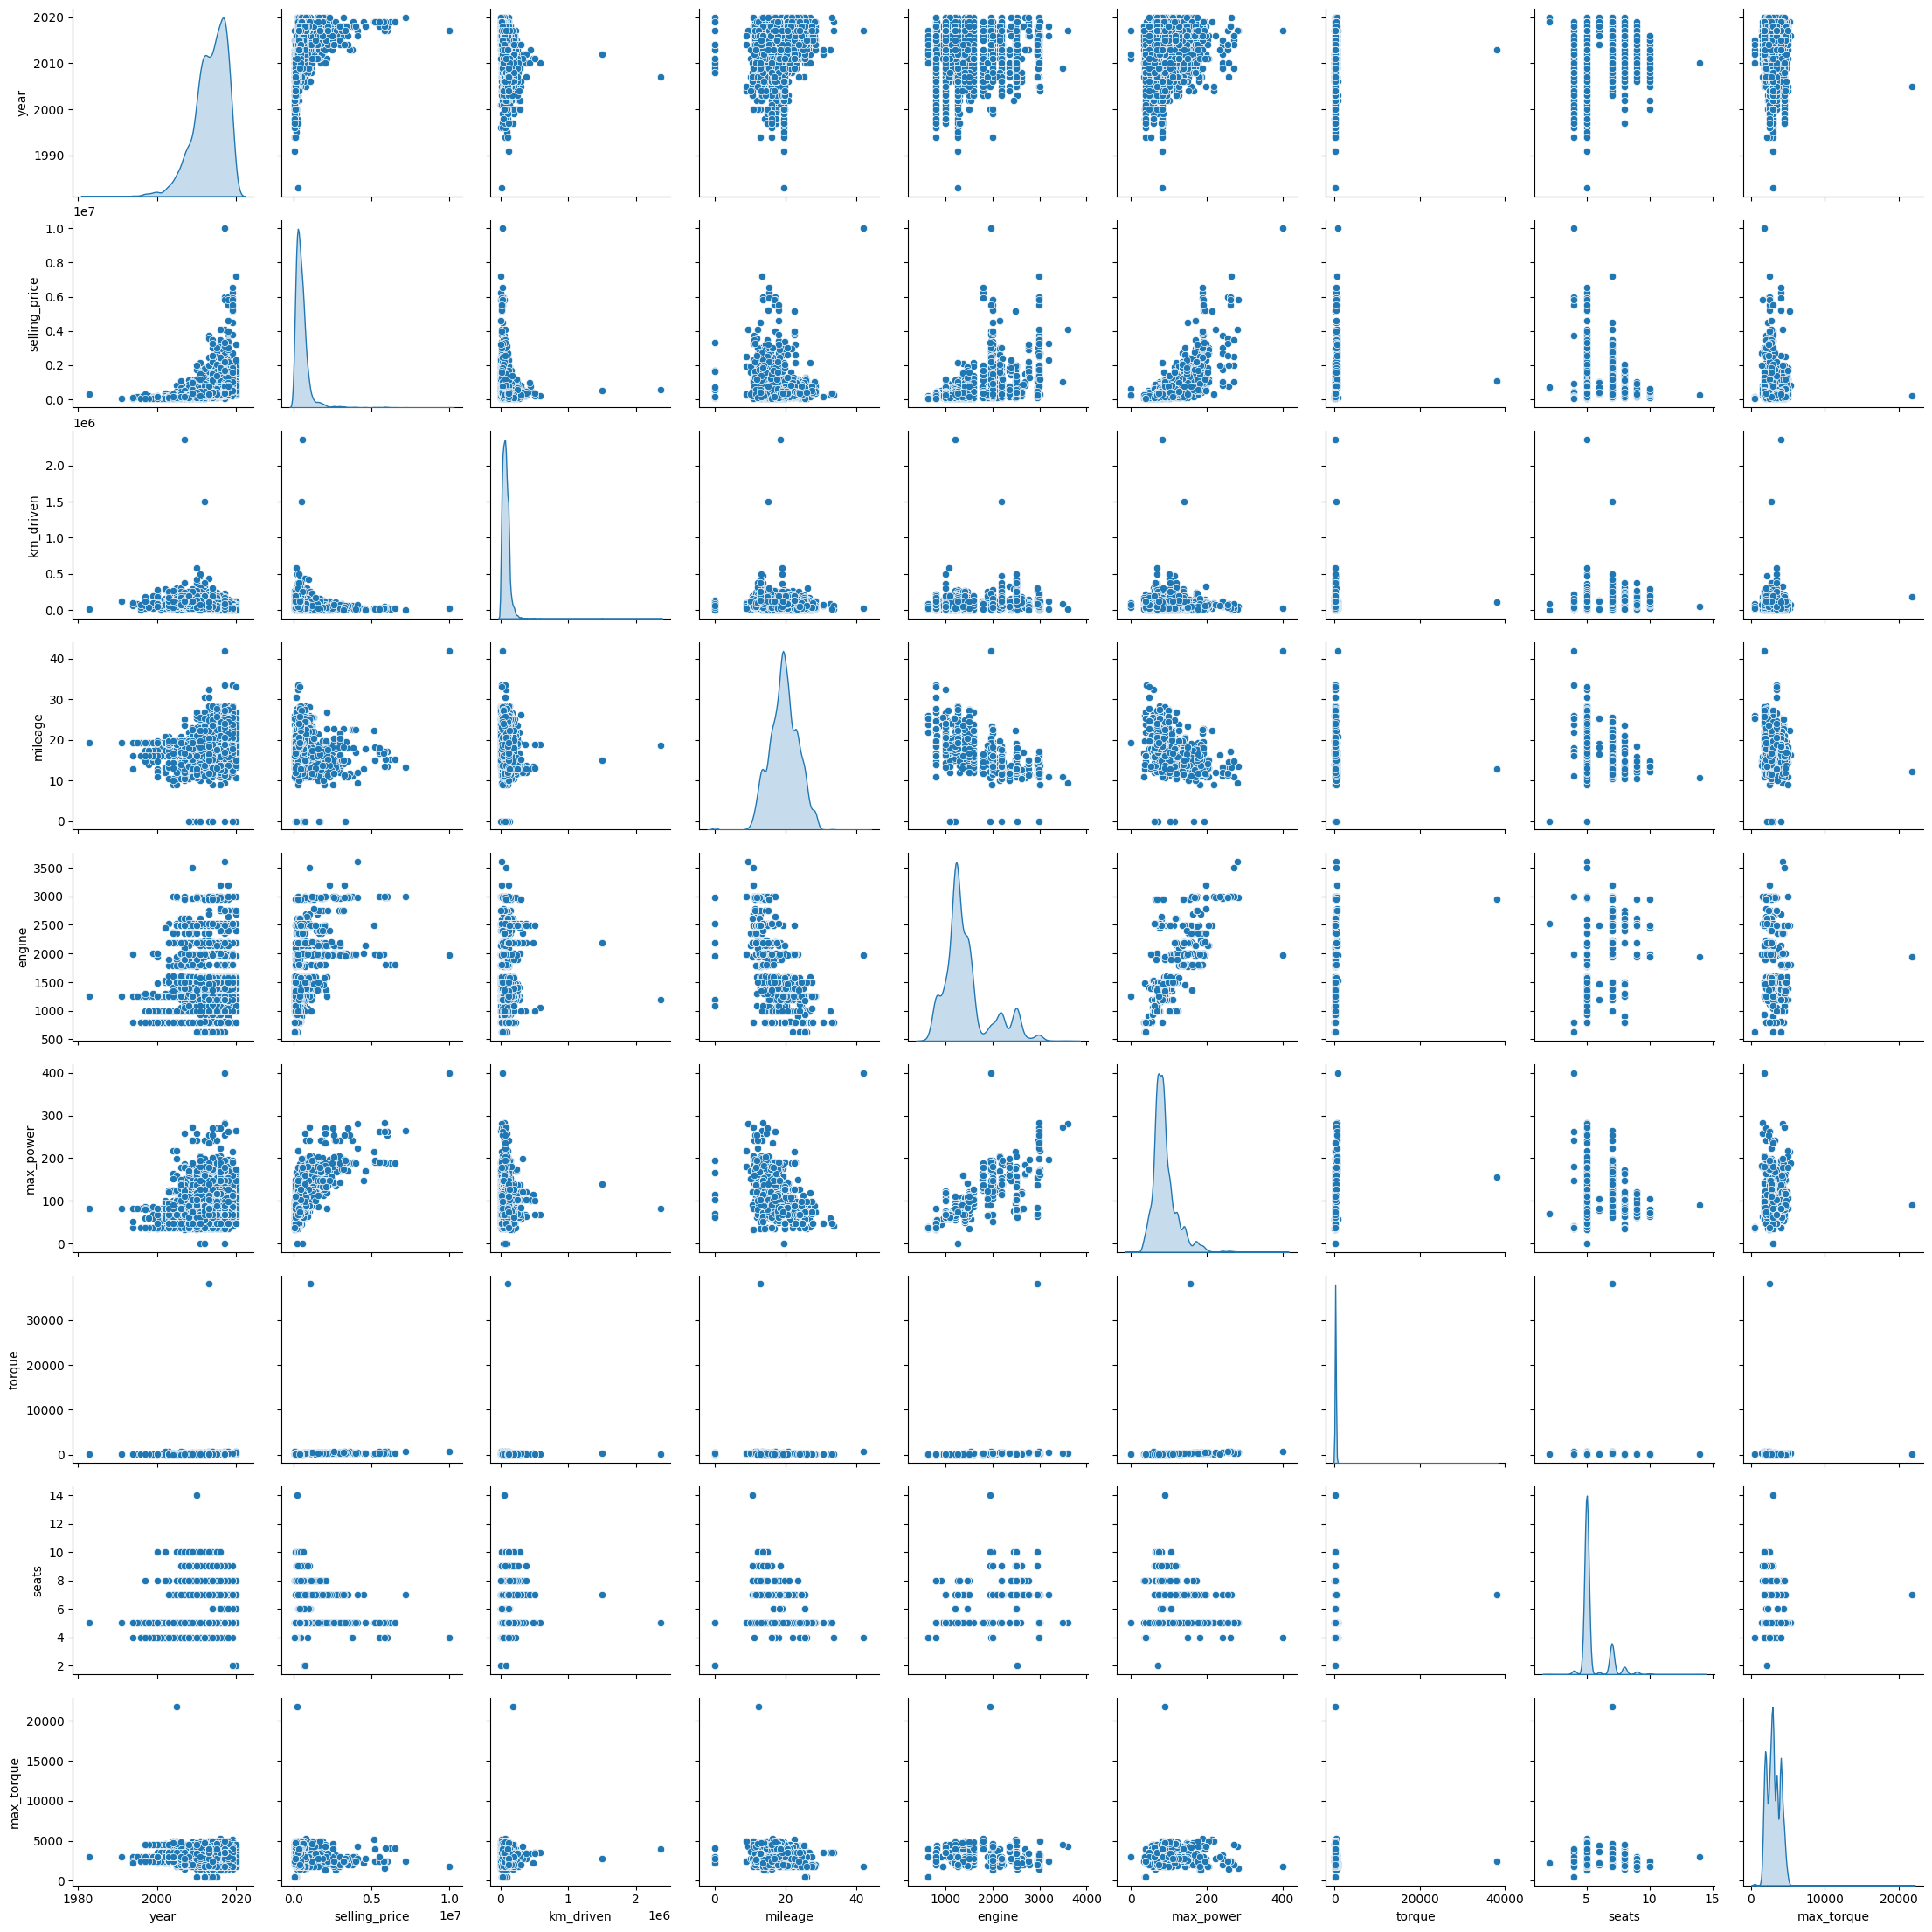

In [29]:
sns.pairplot(df_train, diag_kind='kde')#, hue='selling_price')
plt.show()

–≠—Ç–æ—Ç –≥—Ä–∞—Ñ–∏–∫ –Ω–µ —Ç–∞–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π, –∫–∞–∫ –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –ø–æ—Å—Ç—Ä–æ–∏—Ç—å, –±–µ—Ä—è –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏. –ù–æ –æ–Ω –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–¥–µ–ª–∞—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ (–≤–æ–∑–º–æ–∂–Ω–æ, –¥–∞–ª–µ–∫–æ –∏–¥—É—â–∏–µ) –≤—ã–≤–æ–¥—ã. –í–ø—Ä–æ—á–µ–º, —Å–æ –º–Ω–æ–≥–∏–º–∏ –∏–∑ –Ω–∏—Ö (–µ—Å–ª–∏ –Ω–µ —Å–æ –≤—Å–µ–º–∏) –≤—ã –±—ã —Å–ø—Ä–∞–≤–∏–ª–∏—Å—å —É–º–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–æ. –û–¥–Ω–∞–∫–æ –≤—Å–µ–≥–¥–∞ –ø—Ä–∏—è—Ç–Ω–æ –¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã, –æ—Å–Ω–æ–≤—ã–≤–∞—è—Å—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö.



* <font color='#FF6600'> –ß—Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –æ —Å–≤—è–∑–∏ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π?
    * –ß–µ–º –Ω–æ–≤–µ–µ –º–∞—à–∏–Ω–∞(–±–æ–ª—å—à–µ year) - —Ç–µ–º –≤—ã—à–µ —Ü–µ–Ω–∞
    * –ß–µ–º –º–æ—â–Ω–µ–µ –º–∞—à–∏–Ω–∞ (–±–æ–ª—å—à–µ engine, max_power, torque, max_torque) - —Ç–µ–º –≤—ã—à–µ —Ü–µ–Ω–∞
    * –ß–µ–º –º–µ–Ω—å—à–µ –ø—Ä–æ–µ—Ö–∞–ª–∞ (–º–µ–Ω—å—à–µ km_driven) - —Ç–µ–º –º–µ–Ω—å—à–µ —Ü–µ–Ω–∞
    * –ï—Å—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –∞–≤—Ç–æ–±–∏–ª–µ–π —Å –Ω–µ–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –¥–≤–µ—Ä–µ–π - —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ, —Å–µ–¥–∞–Ω—ã –∏ —É –Ω–∏—Ö —Ü–µ–Ω–∞ –≤—ã—à–µ —á–µ–º —É –º–∞—à–∏–Ω —Å –±–æ–ª–∏—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –¥–≤–µ—Ä–µ–π.
    
* –ê –æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤? 
    * –ß–µ–º –±–æ–ª—å—à–µ –¥–≤–∏–≥–∞—Ç–µ–ª—å —Ç–µ–º –º–æ—â–Ω–µ–µ –∞–≤—Ç–æ–º–æ–±–∏–ª—å (—Å) –ö—ç–ø
    * –ß–µ–º –±–æ–ª—å—à–µ –≥–æ–¥ —Ç–µ–º –±–æ–ª—å—à–µ –∞–≤—Ç–æ–º–æ–±–∏–ª—å –ø—Ä–æ–µ—Ö–∞–ª (—Å) –ö—ç–ø
    * –ê–≤—Ç–æ–º–æ–±–∏–ª–∏ —Å –º–µ–Ω—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –¥–≤–µ—Ä–µ–π - –º–æ—â–Ω–µ–µ (—Å) –ö—ç–ø
    * –ß–µ–º –±–æ–ª—å—à–µ –¥–≤–µ—Ä–µ–π —É –∞–≤—Ç–æ–º–æ–±–∏–ª—è - —Ç–µ–º –º–µ–Ω—å—à–µ –æ–Ω–∏ –ø—Ä–æ–µ–∑–∂–∞—é—å (–ª–∏–±–æ –º–µ–Ω—å—à–µ —É–∫–∞–∑–∞–Ω—ã –≤ –ø–æ–¥–±–æ—Ä–∫–µ)</font>

(0.25 –±–∞–ª–ª–∞) <font color='#9933CC'>–ü–æ—Å—Ç—Ä–æ–π—Ç–µ pairplot –ø–æ —Ç–µ—Å—Ç–æ–≤—ã–º –¥–∞–Ω–Ω—ã–º</font> –∏ –æ—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å <font color='#FF6600'>"–ü–æ—Ö–æ–∂–∏–º–∏ –ª–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ –ø—Ä–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–∏ –Ω–∞ —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç?"</font>

/home/roman/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


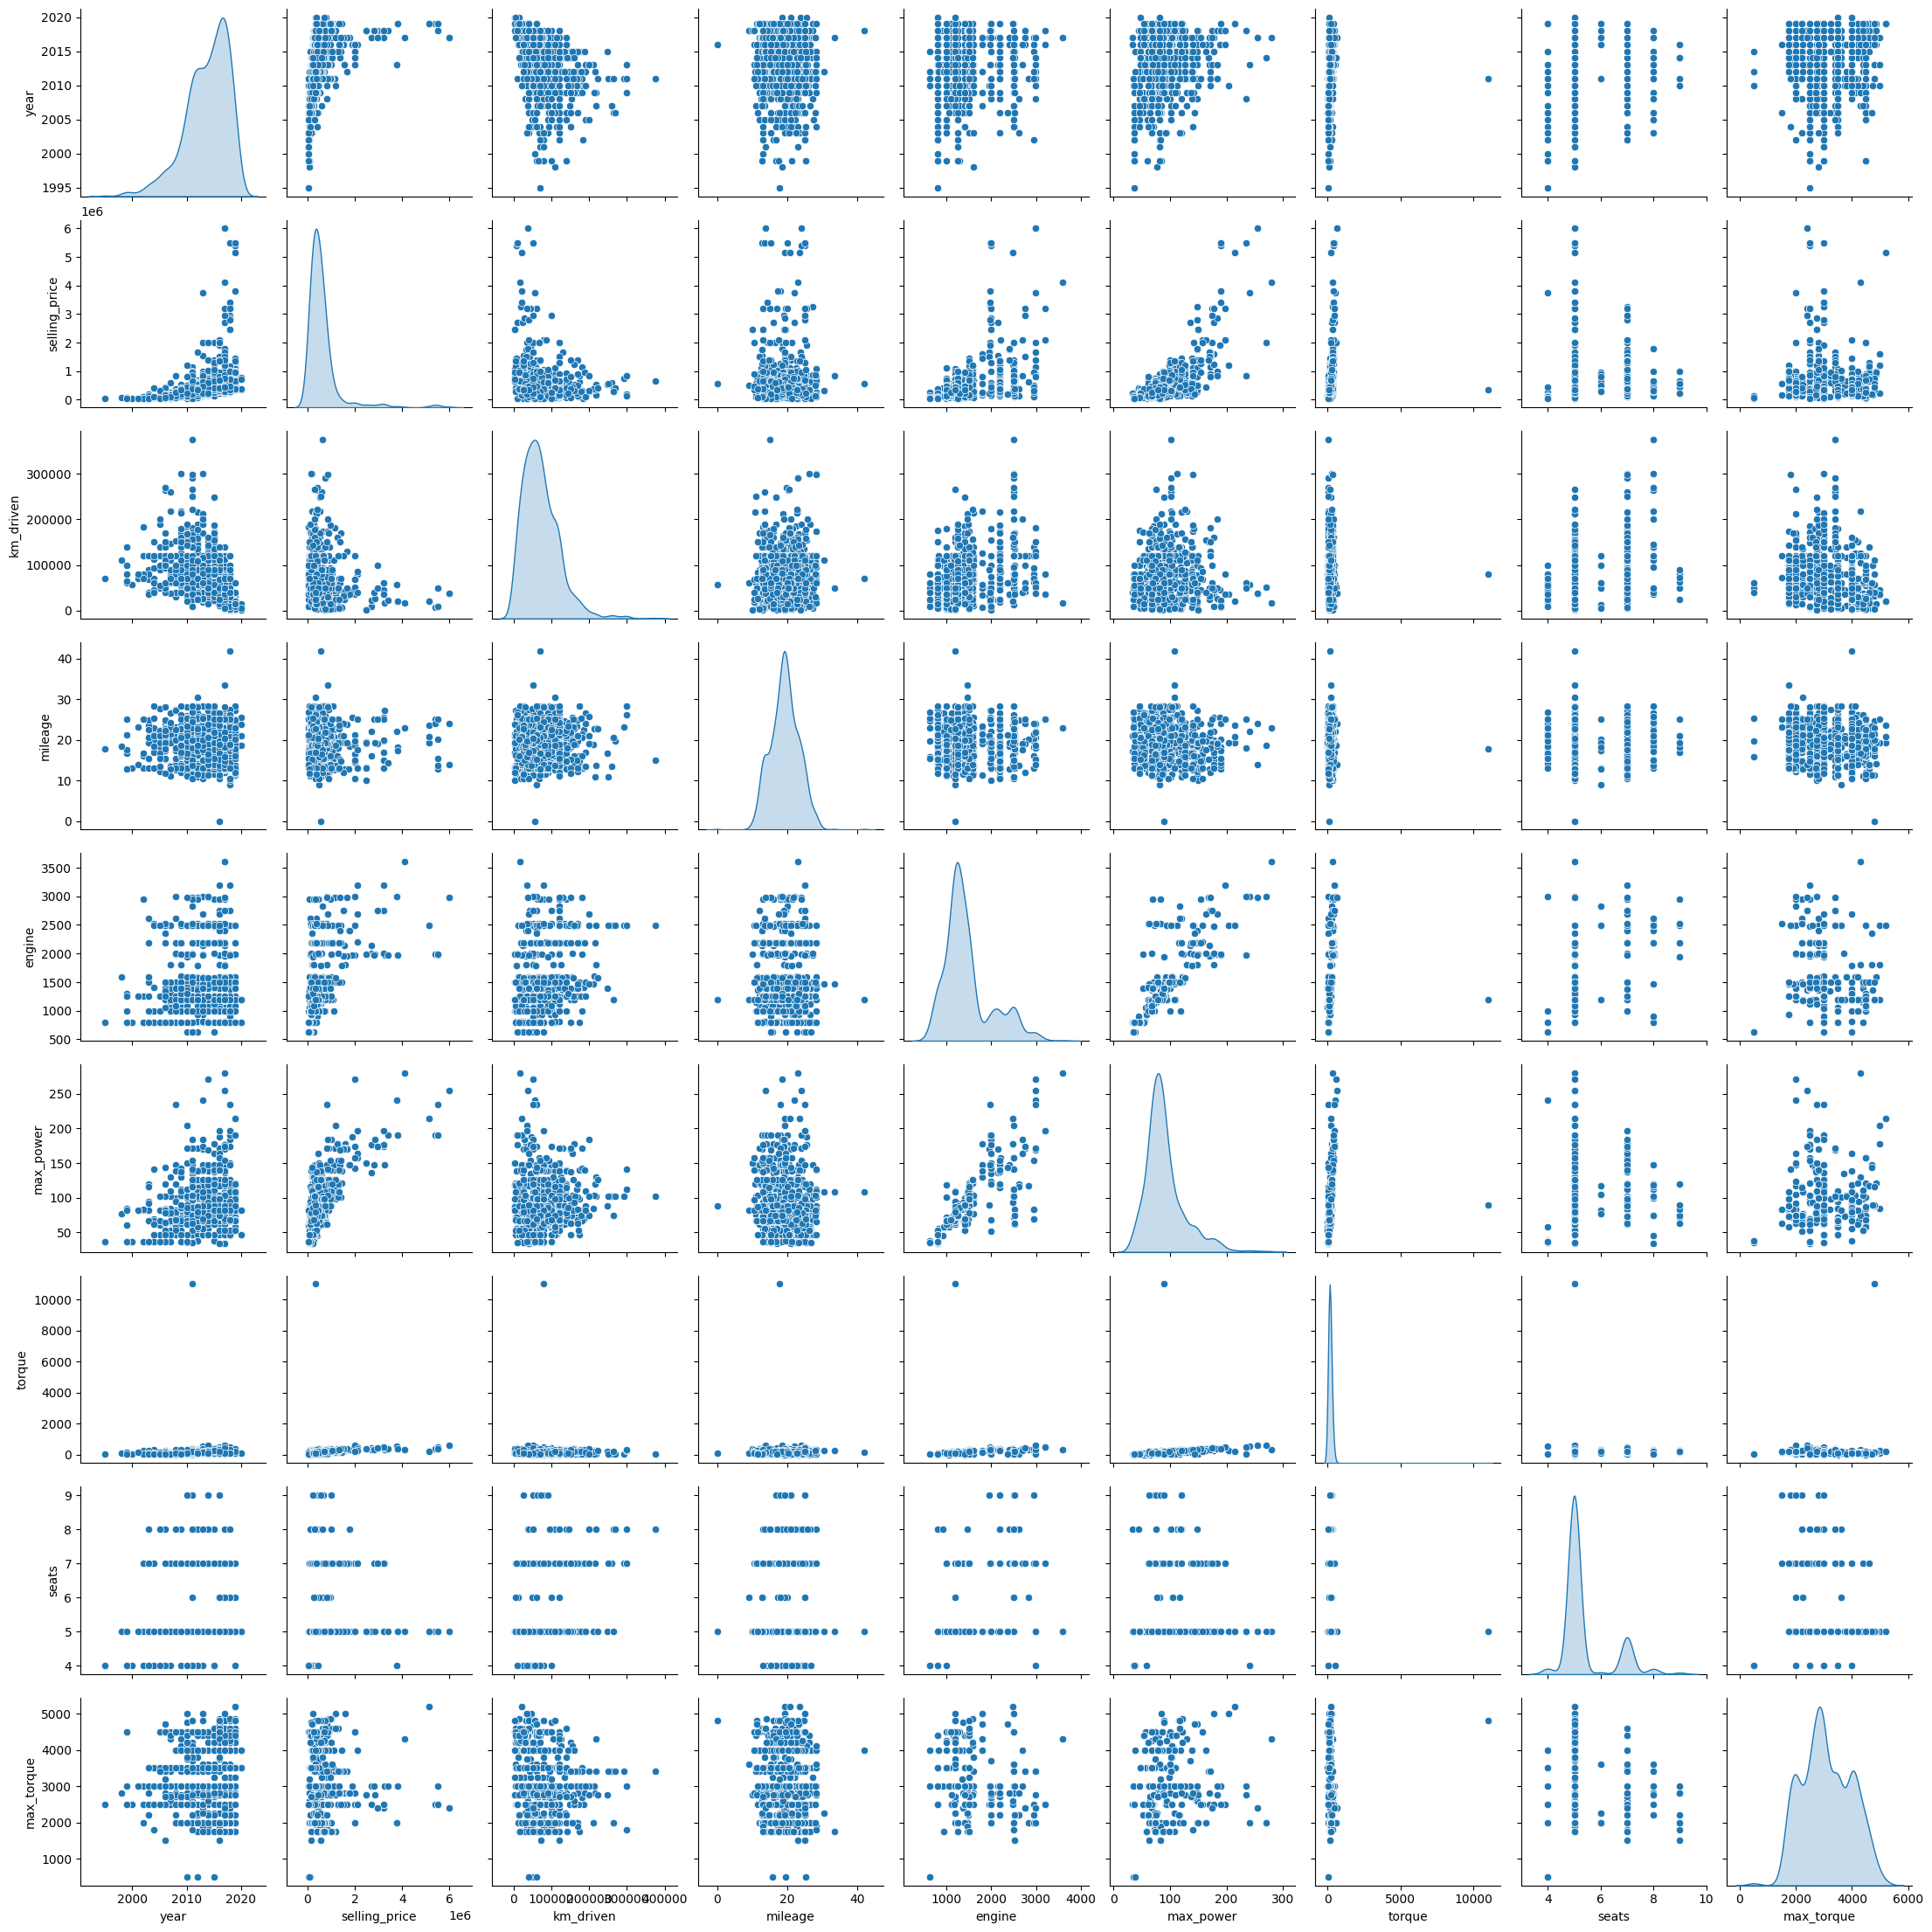

In [30]:
sns.pairplot(df_test, diag_kind='kde')#, hue='selling_price')
plt.show()

(0.25 –±–∞–ª–ª–∞) <font color='#9933CC'>–î–ª—è —Ç—Ä–µ–π–Ω–∞ –¥–∞–≤–∞–π—Ç–µ –ø–æ—Å—Ç—Ä–æ–∏–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É (heatmap –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ seaborn) –ø–æ–ø–∞—Ä–Ω—ã—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫</font>

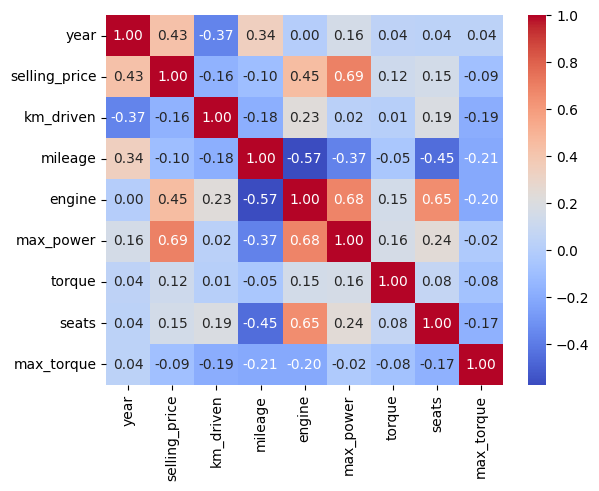

In [31]:
numerical_columns_train = df_train.select_dtypes(include=["number"])

correlation_matrix = numerical_columns_train.corr()

# –°—Ç—Ä–æ–∏–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.show()

–û—Ç–≤–µ—Ç—å—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –Ω–∞ –≤–æ–ø—Ä–æ—Å—ã: 
* <font color='#FF6600'>–ö–∞–∫–∏–µ 2 –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞–∏–º–µ–Ω–µ–µ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã –º–µ–∂–¥—É —Å–æ–±–æ–π?</font>
    * Engine and mileage
* <font color='#FF6600'>–ú–µ–∂–¥—É –∫–∞–∫–∏–º–∏ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –¥–æ–≤–æ–ª—å–Ω–æ —Å–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å?</font>
    * –¶–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ max_power
* <font color='#FF6600'>–ü—Ä–∞–≤–∏–ª—å–Ω–æ –ª–∏, –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ –¥–∞–Ω–Ω—ã–µ, —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å, —á—Ç–æ —á–µ–º –º–µ–Ω—å—à–µ –≥–æ–¥, —Ç–µ–º, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –±–æ–ª—å—à–µ –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤ –ø—Ä–æ–µ—Ö–∞–ª–∞ –º–∞—à–∏–Ω–∞ –∫ –¥–∞—Ç–µ –ø—Ä–æ–¥–∞–∂–∏.</font>
    * –ó–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤ 0,34 –º–µ–∂–¥—É —ç—Ç–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –Ω–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç –Ω–∞–º —ç—Ç–æ —É—Ç–≤–µ—Ä–∂–¥–∞—Ç—å

(0.25 –±–∞–ª–ª–∞) <font color='#9933CC'> –û—Ç–æ–±—Ä–∞–∑–∏—Ç–µ –¥–∏–∞–≥—Ä–∞–º–ºe —Ä–∞—Å—Å–µ—è–Ω–∏—è –¥–ª—è –Ω–∞–∏–±–æ–ª–µ–µ —Å–∫–æ—Ä–µ–ª–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–∞—Ä—ã **–ø—Ä–∏–∑–Ω–∞–∫–æ–≤** (–Ω–∞ —Ç—Ä–µ–π–Ω–µ) </font>

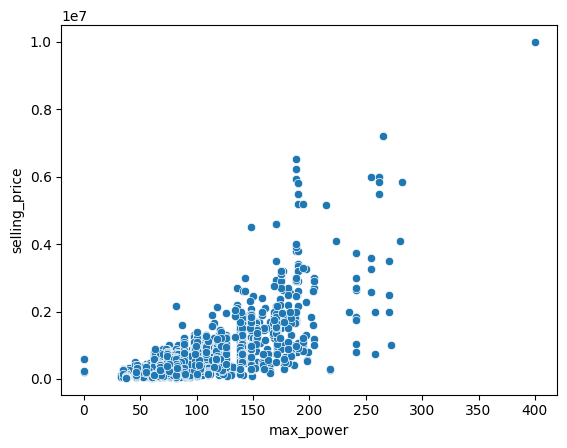

In [32]:
sns.scatterplot(x='max_power', y='selling_price', data=df_train)
plt.show()

### –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ (–±–æ–Ω—É—Å 0.5 –±–∞–ª–ª–∞)

–ï—Å–ª–∏ –≤–∞–º –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –º—ã –Ω–µ –ø–æ–ø—Ä–æ—Å–∏–ª–∏ –≤–∞—Å –Ω–∞—Ä–∏—Å–æ–≤–∞—Ç—å –∫–∞–∫–∏–µ-—Ç–æ –æ—á–µ–Ω—å –≤–∞–∂–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, –Ω–∞—Ä–∏—Å—É–π—Ç–µ –∏—Ö –∏ –ø–æ—è—Å–Ω–∏—Ç–µ.

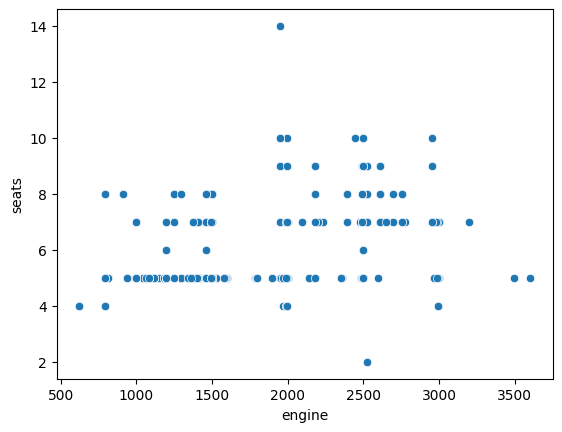

In [33]:
# –ü—Ä–æ—Å—Ç–æ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å –≤ –≤—ã–±–æ—Ä–∫–µ - –∫–∞–∫ –≤–∏–¥–Ω–æ –õ–∞–º–±–æ—Ä–¥–∂–∏–Ω–∏ –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ
sns.scatterplot(x='engine', y='seats', data=df_train)
plt.show()

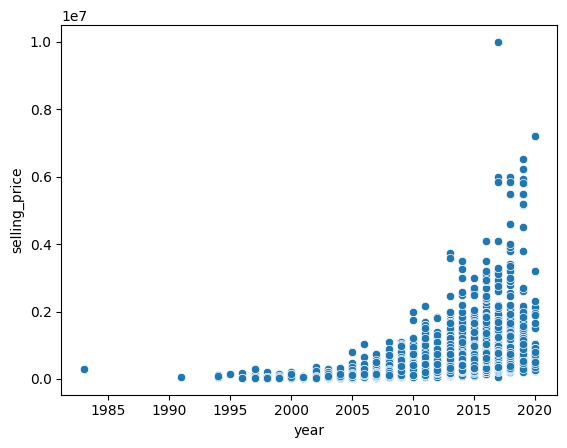

In [34]:
# –•–æ—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∏ –Ω–µ —Å–∞–º–∞—è —Å–∏–ª—å–Ω–∞—è, –Ω–æ –µ—â–µ —Ä–∞–∑ —É–±–µ–∂–¥–∞–µ–º—Å—è, —á—Ç–æ —á–µ–º –º–µ–Ω—å—à–µ –≥–æ–¥ - —Ç–µ–º –±–æ–ª—å—à–µ —Ü–µ–Ω–∞
# –Ω—É –∏ —Ä–∞—Ä–∏—Ç–µ—Ç–Ω—ã–µ –º–∞—à–∏–Ω—ã –≤ –≤—ã–±–æ—Ä–∫–µ –æ—Ç—Å—É—Å—Ç–≤—É—é—Ç
sns.scatterplot(x='year', y='selling_price', data=df_train)
plt.show()

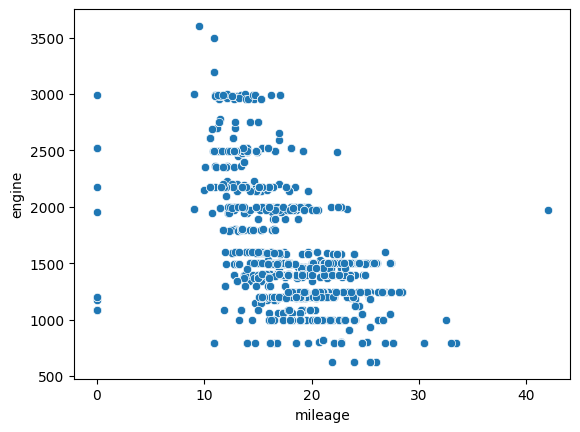

In [35]:
# –ß–µ–º –º–æ—â–Ω–µ–µ –∞–≤—Ç–æ–º–æ–±–∏–ª—å, —Ç–µ–º –º–µ–Ω—å—à–µ –Ω–∞ –Ω–µ–º –µ–∑–¥—è—Ç
sns.scatterplot(x='mileage', y='engine', data=df_train)
plt.show()

# –ß–∞—Å—Ç—å 2 (1.25 –±–∞–ª–ª–∞) | –ú–æ–¥–µ–ª—å —Ç–æ–ª—å–∫–æ –Ω–∞ –≤–µ—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

(0.05 –±–∞–ª–ª–∞) <font color='#9933CC'>–í –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ ``y_train`` –∏ ``y_test`` –∑–∞–ø–∏—à–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö. –°—Ç–æ–ª–±—Ü—ã ``selling_price`` –∏–∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É–¥–∞–ª–∏—Ç—å. –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ (–≤—Å–µ, –∫—Ä–æ–º–µ ``seats``) —Å—Ç–æ–ª–±—Ü—ã —Ç–æ–∂–µ.</font>

In [36]:
y_train = df_train['selling_price'].copy()
X_train = df_train.select_dtypes(include=["number"]).drop(['selling_price'], axis = 1).copy()

In [37]:
assert X_train.shape == (5840, 8) # +2 added max_torque

In [38]:
y_test = df_test['selling_price'].copy()
X_test = df_test.select_dtypes(include=["number"]).drop(['selling_price'], axis = 1).copy()

In [39]:
assert X_test.shape == (1000, 8)

(0.2 –±–∞–ª–ª–∞) <font color='#9933CC'>–û–±—É—á–∏—Ç–µ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫—É—é –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏. –ü–æ—Å—á—Ç–∏—Ç–∞–π—Ç–µ $R^2$ –∏ MSE –¥–ª—è —Ç—Ä–µ–π–Ω–∞ –∏ –¥–ª—è —Ç–µ—Å—Ç–∞</font>

**–ó–∞–º–µ—á–∞–Ω–∏–µ:** $R^2$ –∏ MSE –¥–ª—è —Ç—Ä–µ–π–Ω–∞ –∏ –¥–ª—è —Ç–µ—Å—Ç–∞ –≤—ã–≤–æ–¥–∏—Ç–µ –≤–µ–∑–¥–µ, –≥–¥–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –æ–±—É—á–∞—Ç—å –º–æ–¥–µ–ª–∏, –¥–∞–∂–µ –µ—Å–ª–∏ –≤ —è–≤–Ω–æ–º –≤–∏–¥–µ —ç—Ç–æ–≥–æ –Ω–µ –ø—Ä–æ—Å—è—Ç. –ò–Ω–∞—á–µ –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ, –∫–∞–∫ –ø–æ–Ω—è—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ —É—Å–ø–µ—à–Ω—ã –Ω–∞—à–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã.

P.S. –Ω–∏–∂–µ, –ø–æ—Å–ª–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏–∏

–ó–∞–ø–æ–º–Ω–∏—Ç–µ –ø—Ä–∞–≤–∏–ª–æ:

> –ò—Å–ø–æ–ª—å–∑—É—é –ª–∏–Ω–µ–π–Ω—É—é –º–æ–¥–µ–ª—å -- —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É—é —Ñ–∏—á–∏

(0.25 –±–∞–ª–ª–∞) <font color='#9933CC'>–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –∏–º</font>


In [40]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  
# train scaler on train data
scaler.fit(X_train)

Xtrain_scaled = scaler.transform(X_train)
# as the result we have numpy array so conversion 2 pd is required
Xtrain_scaled = pd.DataFrame(Xtrain_scaled, columns=X_train.columns)  
# or just write Xtrain_scaled = scaler.fit_transform(Xtrain)

Xtest_scaled = scaler.transform(X_test)
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=X_test.columns)

In [41]:
linreg = LinearRegression()
linreg.fit(Xtrain_scaled, y_train)

linregAndEda = LinregAndEda()

print("Model metrics for train")
linregAndEda.show_metrics(linreg, Xtrain_scaled, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(linreg, Xtest_scaled, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._base.LinearRegression'>: 0.5999959610633816
MSE score for <class 'sklearn.linear_model._base.LinearRegression'>: 114656493057.23566
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._base.LinearRegression'>: 0.5987539705798692
MSE score for <class 'sklearn.linear_model._base.LinearRegression'>: 230647675547.2345


–ù–µ –æ—á–µ–Ω—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏–≤–Ω–æ.

–ó–∞—Ç–æ —É–∂–µ —Å–µ–π—á–∞—Å –º–æ–∂–µ–º –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å. <font color='#FF6600'>"–ö–∞–∫–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –æ–∫–∞–∑–∞–ª—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏ —Ü–µ–Ω—ã?"</font>

> Max_power –∏–º–µ–µ—Ç –Ω–∞–∏–±–æ–ª—å—à–∏–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å. max_power = 328998.226903

In [42]:
features = Xtrain_scaled.columns
weights = linreg.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values(by='Weight', ascending=False)

Feature         Weight
4   max_power  328998.226903
0        year  164453.085020
3      engine   31373.743713
5      torque    -274.152691
2     mileage   -5314.797831
6       seats  -29882.028301
1   km_driven  -48446.632226
7  max_torque  -55498.662142

(0.25 –±–∞–ª–ª–∞) <font color='#9933CC'>–¢–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É–µ–º Lasso-—Ä–µ–≥—Ä–µ—Å—Å–∏—é.</font> –ó–¥–µ—Å—å –∏ –¥–∞–ª—å—à–µ –æ–±—É—á–∞–π—Ç–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

In [43]:
from sklearn.linear_model import Lasso

model_l1 = Lasso()

model_l1.fit(Xtrain_scaled, y_train)

Lasso()

In [44]:
print("Model metrics for train")
linregAndEda.show_metrics(model_l1, Xtrain_scaled, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(model_l1, Xtest_scaled, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._coordinate_descent.Lasso'>: 0.599995961010811
MSE score for <class 'sklearn.linear_model._coordinate_descent.Lasso'>: 114656493072.30441
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._coordinate_descent.Lasso'>: 0.5987531765629472
MSE score for <class 'sklearn.linear_model._coordinate_descent.Lasso'>: 230648131970.83496


<font color='#FF6600'>–ó–∞–Ω—É–ª–∏–ª–∞ –ª–∏ L1-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –∫–∞–∫–∏–µ-–Ω–∏–±—É–¥—å –≤–µ—Å–∞? –ü–æ—á–µ–º—É –∂–µ?</font>

> –ú—ã –Ω–µ —É—Å—Ç–∞–Ω–æ–≤–∏–ª–∏ —Å–∏–ª—É —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –∏ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –æ–∫–∞–∑–∞–ª–æ—Å—å —Å–ª–∞–±—ã–º –¥–ª—è —ç—Ç–æ–≥–æ

In [45]:
model_l1.coef_

array([ 1.64450897e+05, -4.84456896e+04, -5.31160035e+03,  3.13713201e+04,
        3.28999267e+05, -2.72865986e+02, -2.98780674e+04, -5.54964239e+04])

(0.25 –±–∞–ª–ª–∞) <font color='#9933CC'>–ü–µ—Ä–µ–±–æ—Ä–æ–º –ø–æ —Å–µ—Ç–∫–µ (c 10-—é —Ñ–æ–ª–¥–∞–º–∏) –ø–æ–¥–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è Lasso-—Ä–µ–≥—Ä–µ—Å—Å–∏–∏</font>

–í–∞–º –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è –∫–ª–∞—Å—Å [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


lasso_model = Lasso()

alphas = np.logspace(0, 8, 1000)  # 1000 —Ç–æ—á–µ–∫ –æ—Ç 1 –¥–æ 10^8

param_grid = {'alpha': alphas}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(lasso_model, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(Xtrain_scaled, y_train)

print("–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha:", grid_search.best_params_)

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha: {'alpha': 3528.154115380883}


<font color='#FF6600'>–°–∫–æ–ª—å–∫–æ –≥—Ä–∏–¥-—Å—ë—Ä—á—É –ø—Ä–∏—à–ª–æ—Å—å –æ–±—É—á–∞—Ç—å –º–æ–¥–µ–ª–µ–π?</font>

> 1000 –∑–Ω–∞—á–µ–Ω–∏–π –∞–ª—å—Ñ–∞, 10 —Ñ–æ–ª–¥–æ–≤ -> 10000 –º–æ–¥–µ–ª–µ–π

<font color='#FF6600'>–ö–∞–∫–æ–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ —É –ª—É—á—à–µ–π –∏–∑ –ø–µ—Ä–µ–±—Ä–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π? –ó–∞–Ω—É–ª–∏–ª–∏—Å—å –ª–∏ –∫–∞–∫–∏–µ-–Ω–∏–±—É–¥—å –∏–∑ –≤–µ—Å–æ–≤ –ø—Ä–∏ —Ç–∞–∫–æ–π —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏?</font>

> –¥–∞ - mileage	and torque

In [47]:
model_l1 = Lasso(alpha=3528.15)

model_l1.fit(Xtrain_scaled, y_train)

print("Model metrics for train")
linregAndEda.show_metrics(model_l1, Xtrain_scaled, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(model_l1, Xtest_scaled, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._coordinate_descent.Lasso'>: 0.5995600786461983
MSE score for <class 'sklearn.linear_model._coordinate_descent.Lasso'>: 114781433669.01648
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._coordinate_descent.Lasso'>: 0.5948775096470034
MSE score for <class 'sklearn.linear_model._coordinate_descent.Lasso'>: 232875975986.2627


In [48]:
features = Xtrain_scaled.columns
weights = model_l1.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values(by='Weight', ascending=False)

Feature         Weight
4   max_power  332581.395851
0        year  159136.699383
3      engine   20568.397706
2     mileage      -0.000000
5      torque       0.000000
6       seats  -17308.158668
1   km_driven  -44903.133601
7  max_torque  -49929.628316

(0.25 –±–∞–ª–ª–∞) <font color='#9933CC'>–ü–µ—Ä–µ–±–æ—Ä–æ–º –ø–æ —Å–µ—Ç–∫–µ (c 10-—é —Ñ–æ–ª–¥–∞–º–∏) –ø–æ–¥–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-—Ä–µ–≥—Ä–µ—Å—Å–∏–∏</font>

In [49]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet()

parameters = {'alpha': np.logspace(0, 8, 50), 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(elastic_net_model, parameters, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(Xtrain_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e+00, 1.45634848e+00, 2.12095089e+00, 3.08884360e+00,
       4.49843267e+00, 6.55128557e+00, 9.54095476e+00, 1.38949549e+01,
       2.02358965e+01, 2.94705170e+01, 4.29193426e+01, 6.25055193e+01,
       9.10298178e+01, 1.32571137e+02, 1.93069773e+02, 2...
       3.72759372e+04, 5.42867544e+04, 7.90604321e+04, 1.15139540e+05,
       1.67683294e+05, 2.44205309e+05, 3.55648031e+05, 5.17947468e+05,
       7.54312006e+05, 1.09854114e+06, 1.59985872e+06, 2.32995181e+06,
       3.39322177e+06, 4.94171336e+06, 7.19685673e+06, 1.04811313e+07,
       1.52641797e+07, 2.22299648e+07, 3.23745754e+07, 4.71486636e+07,
       6.86648845e+07, 1.00000000e+08]),
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_squared_error')

<font color='#FF6600'>–ö–∞–∫–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –ª—É—á—à–µ–π –∏–∑ –ø–µ—Ä–µ–±—Ä–∞–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π?</font>

In [50]:
print("–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", grid_search.best_params_)

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'alpha': 3906.939937054613, 'l1_ratio': 1}


In [51]:
elastic_net_model = ElasticNet(alpha=3906.94, l1_ratio = 1)

elastic_net_model.fit(Xtrain_scaled, y_train)

ElasticNet(alpha=3906.94, l1_ratio=1)

In [52]:
print("Model metrics for train")
linregAndEda.show_metrics(elastic_net_model, Xtrain_scaled, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(elastic_net_model, Xtest_scaled, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 0.5994704768125683
MSE score for <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 114807116989.72205
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 0.5943672784651335
MSE score for <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 233169271439.57858


–ü—Ä–µ–¥–ª–∞–≥–∞–µ–º –≤–∞–º –æ—Å—Ç–∞–≤–∏—Ç—å –≤–∞–º –ø–æ–ø—ã—Ç–∫–∏ –∑–∞–º–µ—Ç–Ω–æ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π –∏ –ø–µ—Ä–µ–π—Ç–∏ –∫ —Å–ª–µ–¥—É—é—â–µ–π —á–∞—Å—Ç–∏ –∑–∞–¥–∞–Ω–∏—è.

# –ß–∞—Å—Ç—å 3 (0.5 –±–∞–ª–ª–∞) | –î–æ–±–∞–≤–ª—è–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Ñ–∏—á–∏



(0 –±–∞–ª–ª–æ–≤) <font color='#9933CC'>–ò–∑ ``df_train`` —É–¥–∞–ª–∏—Ç–µ —Å—Ç–æ–ª–±—Ü—ã —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –Ω–∞–∑–≤–∞–Ω–∏–µ–º –∞–≤—Ç–æ–º–æ–±–∏–ª—è.</font>

In [53]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1).copy()
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1).copy()

In [54]:
assert X_train_cat.shape == (5840, 12) # +2

In [55]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

(0.5 –±–∞–ª–ª–∞) <font color='#9933CC'>–ó–∞–∫–æ–¥–∏—Ä—É–π—Ç–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª–ª—å–Ω—ã–µ —Ñ–∏—á–∏ –∏ ``seats`` –º–µ—Ç–æ–¥–æ–º OneHot-–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è</font>

> –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –≤–æ –∏–∑–±–µ–∂–∞–Ω–∏–µ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ —Å–ª–µ–¥—É–µ—Ç –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç –æ–¥–Ω–æ–≥–æ –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –ø—Ä–∏ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–∏ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –º–µ—Ç–æ–¥–æ–º OneHot. 

In [56]:
# –≠—Ç–∞ —á–∞—Å—Ç—å –Ω—É–∂–Ω–∞ –¥–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –≤ —Ç—Ä–µ–π–Ω–µ –∏ —Ç–µ—Å—Ç–µ –±—ã–ª–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤
# *–≤ —Ç—Ä–µ–π–Ω–µ –ø—Ä–æ—Å—Ç–æ –º–µ–Ω—å—à–µ –¥–∞–Ω–Ω—ã—Ö, —Ç—É—Ç –º—ã —á–∏—Ç–µ—Ä–∏–º, —Ç–∞–∫ –∫–∞–∫ —É–∂–µ –æ–±–æ–∂–≥–ª–∏—Å—å –Ω–∞ –∫–æ–ª–æ–Ω–∫–µ seats
unique_train_values = X_train_cat['seats'].unique()
unique_test_values = X_test_cat['seats'].unique()

all_unique_values = set(unique_train_values) | set(unique_test_values)

all_unique_values

{2, 4, 5, 6, 7, 8, 9, 10, 14}

In [57]:
from sklearn.preprocessing import OneHotEncoder # –∏–ª–∏ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å get_dummies –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ pandas

X_train_cat = pd.get_dummies(X_train_cat, drop_first=True, columns=['seats'])
X_train_cat = pd.get_dummies(X_train_cat, drop_first=True, columns=['fuel'])
X_train_cat = pd.get_dummies(X_train_cat, drop_first=True, columns=['seller_type'])
X_train_cat = pd.get_dummies(X_train_cat, drop_first=True, columns=['transmission'])
X_train_cat = pd.get_dummies(X_train_cat, drop_first=True, columns=['owner'])

In [58]:
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True, columns=['seats'])
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True, columns=['fuel'])
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True, columns=['seller_type'])
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True, columns=['transmission'])
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True, columns=['owner'])


In [59]:
missing_cols = set(X_train_cat.columns) - set(X_test_cat.columns)
for col in missing_cols:
    X_test_cat[col] = False

In [60]:
X_train_cat = X_train_cat.sort_index(axis=1)
X_test_cat = X_test_cat.sort_index(axis=1)

In [61]:
scaler.fit(X_train_cat)

X_train_cat_scaled = scaler.transform(X_train_cat)
X_train_cat_scaled = pd.DataFrame(X_train_cat_scaled, columns=X_test_cat.columns)  


X_test_cat_scaled = scaler.transform(X_test_cat)
X_test_cat_scaled = pd.DataFrame(X_test_cat_scaled, columns=X_train_cat.columns)

(0.25 –±–∞–ª–ª–∞) <font color='#9933CC'>–ü–µ—Ä–µ–±–µ—Ä–∏—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ `alpha` –¥–ª—è –≥—Ä–µ–±–Ω–µ–≤–æ–π (ridge) —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å –ø–æ–º–æ—â—å—é –∫–ª–∞—Å—Å–∞ `GridSearchCV`.</font> –í –∫–∞—á–µ—Å—Ç–≤–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø—Ä–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏–∏ GridSearchCV –∫—Ä–æ–º–µ –º–æ–¥–µ–ª–∏ —É–∫–∞–∂–∏—Ç–µ –º–µ—Ç—Ä–∏–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ $R^2$. –ö—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∏—Ä—É–π—Ç–µ—Å—å –ø–æ 10-—Ç–∏ —Ñ–æ–ª–¥–∞–º.

<font color='#FF6600'>–£–¥–∞–ª–æ—Å—å –ª–∏ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π?</font>

> –í—Ä–æ–¥–µ –∫–∞–∫ –¥–∞, –Ω–æ —É MSE –≤—Å–µ –µ—â–µ –±–µ–∑—É–º–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ 95452110270.66649 –Ω–∞ —Ç—Ä–µ–π–Ω–µ –∏ 221298291038.85986 –Ω–∞ —Ç–µ—Å—Ç–µ.

In [62]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

ridge_model = Ridge()

alphas = np.logspace(0, 8, 200)  
#print(alphas)

scorer = make_scorer(r2_score)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search_ridge = GridSearchCV(ridge_model, {'alpha': alphas}, cv=cv, scoring=scorer)

grid_search_ridge.fit(X_train_cat_scaled, y_train)

print("–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2:", grid_search_ridge.best_params_)

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2: {'alpha': 541.5871378079471}


In [63]:
ridge_model = Ridge(alpha=541.59)
ridge_model.fit(X_train_cat_scaled, y_train)

Ridge(alpha=541.59)

In [64]:
print("Model metrics for train")
linregAndEda.show_metrics(ridge_model, X_train_cat_scaled, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(ridge_model, X_test_cat_scaled, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.6669946148254309
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 95452110270.66649
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.6150186192593187
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 221298291038.85986


# –ß–∞—Å—Ç—å 4 - –±–æ–Ω—É—Å–Ω–∞—è (1.5 –±–∞–ª–ª–∞) | Feature Engineering 

–í —ç—Ç–æ–π —á–∞—Å—Ç–∏ –¥–æ–º–∞—à–Ω–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è –≤–∞–º –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –ø—Ä–æ—è–≤–∏—Ç—å —Å–≤–æ—é –∫—Ä–µ–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –º–æ–¥–µ–ª–∏. –õ—é–±—ã–µ –¥—Ä—É–≥–∏–µ –º–æ–¥–µ–ª–∏, –∫—Ä–æ–º–µ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ñ–æ—Ä–º –ª–∏–Ω–µ–π–Ω–æ–π (–∏–ª–∏ –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–π) —Ä–µ–≥—Ä–µ—Å—Å–∏, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∑–∞–ø—Ä–µ—â–∞–µ—Ç—Å—è. –ê –∑–Ω–∞—á–∏—Ç, –ø—Ä–∏–¥–µ—Ç—Å—è —Ä–∞–±–æ—Ç–∞—Ç—å —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

**–ß—Ç–æ –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —Å–¥–µ–ª–∞—Ç—å?** (–∫–∞–∂–¥—ã–π –ø—É–Ω–∫—Ç –ø–æ 0.4 –±–∞–ª–ª–∞, –Ω–æ –Ω–µ –±–æ–ª—å—à–µ 2-—Ö –±–∞–ª–ª–æ–≤ –≤ —Å—É–º–º–µ)

1.   *–°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏—Ö:*
    * –ø–æ—Å—á–∏—Ç–∞—Ç—å –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è // —á–∞—Å—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å —á–∏—Å–ª–æ "–ª–æ—à–∞–¥–µ–π" –Ω–∞ –ª–∏—Ç—Ä –æ–±—ä–µ–º–∞ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω–æ);
    * –∏–º–µ–µ—Ç —Å–º—ã—Å–ª –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤ —á–∞—Å—Ç–∏ —Å EDA (–∫ –ø—Ä–∏–º–µ—Ä—É, –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –≥–æ–¥–∞ –≤—ã–≥–ª—è–¥–∏—Ç –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π, –∞ –Ω–µ –ª–∏–Ω–µ–π–Ω–æ–π; –∑–Ω–∞—á–∏—Ç, –∫–≤–∞–¥—Ä–∞—Ç –≥–æ–¥–∞ –Ω–∞–º, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –ø—Ä–∏–Ω–µ—Å–µ—Ç –±–æ–ª—å—à–µ –ø–æ–ª—å–∑—ã)

2.   *–î–æ–±—ã—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:*
    * –∏–º–µ–µ–º –Ω–∞–∑–≤–∞–Ω–∏–µ –∞–≤—Ç–æ–º–æ–±–∏–ª—è, –∫–æ—Ç–æ—Ä–æ–µ –Ω–∏–∫–∞–∫ –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º (–º–æ–∂–Ω–æ —Å–ø–∞—Ä—Å–∏—Ç—å –∏–Ω—Ñ—É –æ –∫–ª–∞—Å—Å–µ –∞–≤—Ç–æ–º–æ–±–∏–ª—è –∏–ª–∏ –∫–∞–∫–∏—Ö-—Ç–æ —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–∏—Ö –æ–ø—Ü–∏—è—Ö)
    * –º–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –ø–æ—Ä–æ–≥–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤—Ä–æ–¥–µ "–≤–ª–∞–¥–µ–ª–µ—Ü —Ç—Ä–µ—Ç–∏–π –∏–ª–∏ –±–æ–ª—å—à–µ" –∏ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –æ—Å–º—ã—Å–ª–µ–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–∞–ø—Ä–∏–º–µ—Ä "–ø–µ—Ä–≤—ã–π –∏–ª–∏ –≤—Ç–æ—Ä–æ–π –≤–ª–∞–¥–µ–ª–µ—Ü –∏ –ø—Ä–æ–¥–∞–≤–µ—Ü –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω—ã–π –¥–∏–ª–µ—Ä" (–ø–æ–¥–±–∏—Ä–∞—Ç—å –ø–æ—Ä–æ–≥–∏ —É–¥–æ–±–Ω–æ –ø–æ –¥–∏–∞–≥—Ä–∞–º–º–∞–º —Ä–∞—Å—Å–µ—è–Ω–∏—è)

3.   *–ü–æ—Ä–∞–±–æ—Ç–∞—Ç—å —Å —É–∂–µ –∏–º–µ—é—â–∏–º–∏—Å—è:*
    * –¥–∞–ª–µ–∫–æ –Ω–µ —Ñ–∞–∫—Ç, —á—Ç–æ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫ –º–µ–¥–∏–∞–Ω–æ–π –±—ã–ª–æ –ª—É—á—à–µ–π –∏–¥–µ–µ–π (–∫–∞–∫ –º–∏–Ω–∏–º—É–º, –º–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å dummy-—Å—Ç–æ–ª–±–µ—Ü –¥–ª—è –º–æ–¥–µ–ª–∏, —Å–∏–≥–Ω–∞–ª–∏–∑–∏—Ä—É—é—â–∏–π, —á—Ç–æ —Ä–∞–Ω—å—à–µ –Ω–∞ –º–µ—Å—Ç–µ –º–µ–¥–∏–∞–Ω—ã –±—ã–ª –ø—Ä–æ–ø—É—Å–∫ -- —Ç–∞–º –≥–¥–µ –æ–Ω –±—ã–ª, –∫–æ–Ω–µ—á–Ω–æ); –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –¥—Ä—É–≥–∏–µ —Å–ø–æ—Å–æ–±—ã —Ñ–∏–ª–ª–∏–Ω–≥–∞;
    * –º—ã –Ω–µ –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–ª–∏, –µ—Å—Ç—å –ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –≤—ã–±—Ä–æ—Å—ã => –Ω–∏–∫–∞–∫ –≤—ã–±—Ä–æ—Å—ã –Ω–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–ª–∏; –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç—ã–º –∏, —Ç–µ–º –Ω–µ –º–µ–Ω–µ–µ, –¥–æ–≤–æ–ª—å–Ω–æ –ø–æ–ª–µ–∑–Ω—ã–º –≤–∞—Ä–∏–∞–Ω—Ç–æ–º –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –º–æ–≥—É—Ç –ø–æ—Å–ª—É–∂–∏—Ç—å boxplot'—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞; —á—Ç–æ –¥–µ–ª–∞—Ç—å —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –¥—É–º–∞–π—Ç–µ —Å–∞–º–∏ :) -- –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ –¥–æ–≤–æ–ª—å–Ω–æ –º–Ω–æ–≥–æ
    * –º—ã —Ç–æ–ª–∫–æ–º –Ω–µ —Å–º–æ—Ç—Ä–µ–ª–∏ –Ω–∞ —Ç–∞—Ä–≥–µ—Ç —Å–∞–º –ø–æ —Å–µ–±–µ; –≤ –Ω–µ–º —Ç–æ–∂–µ –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω–æ—Å—Ç–∏ -- —Å—Ç–æ–∏—Ç —Ö–æ—Ç—è –±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å
    * –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Å–æ–≤—Å–µ–º –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ; –≤–æ–∑–º–æ–∂–Ω–æ –∏—Ö —Å—Ç–æ–∏—Ç –æ—Ç–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞—Ç—å

–ò —Ç–∞–∫ –¥–∞–ª–µ–µ...

Feel Free to Try!

In [65]:
# 1 –ø–æ–π–¥–µ–º –≤ –ª–æ–± –∏ –¥–æ–±–∞–≤–∏–º –ø–æ–ª–∏–Ω–æ–Ω–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ 2 —Å—Ç–µ–ø–µ–Ω–∏
from sklearn.preprocessing import PolynomialFeatures  

pf = PolynomialFeatures(degree = 2)

pf.fit(X_train_cat)

Xtrain_pol = pf.transform(X_train_cat)
Xtest_pol = pf.transform(X_test_cat)

In [66]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(Xtrain_pol, y_train)

/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.8584e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=1)

In [67]:
print("Model metrics for train")
linregAndEda.show_metrics(ridge_model, Xtrain_pol, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(ridge_model, Xtest_pol, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.8769019444263202
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 35284622104.72637
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: -77.96376056712623
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 45390624434581.12


> –í–∏–¥–∏–º, —á—Ç–æ –º–æ–¥–µ–ª—å –ø–µ—Ä–µ–æ–±—É—á–∏–ª–∞—Å—å, –¥–∞–≤–∞–π—Ç–µ –ø–æ–¥–±–µ—Ä–µ–º –∞–ª—å—Ñ—É

In [68]:
ridge_model = Ridge()

alphas = np.logspace(0, 8, 200) 

scorer = make_scorer(r2_score)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search_ridge = GridSearchCV(ridge_model, {'alpha': alphas}, cv=cv, scoring=scorer)

grid_search_ridge.fit(Xtrain_pol, y_train)

print("–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2:", grid_search_ridge.best_params_)

/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.03801e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.14952e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.8694e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.93109e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/roman/.local/lib/python3.10/site-packages/sklearn/l

/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.3238e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.24419e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.24049e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.24228e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/roman/.local/lib/python3.10/site-packages/sklearn/l

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2: {'alpha': 20022.003718155844}


/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.37223e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.35719e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.85261e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


> –û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2: {'alpha': 20022.003718155844}

In [69]:
ridge_model = Ridge(alpha=20022)
ridge_model.fit(Xtrain_pol, y_train)

/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.85261e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=20022)

In [70]:
print("Model metrics for train")
linregAndEda.show_metrics(ridge_model, Xtrain_pol, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(ridge_model, Xtest_pol, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.8375831219080202
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 46554904057.56051
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.45722067624158313
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 312005054706.46234


> –ù–µ–º–Ω–æ–≥–æ –∏–∑–±–∞–≤–∏–ª–∏—Å—å –æ—Ç –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è, –Ω–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞ —Ç–µ—Å—Ç–µ –Ω–µ –æ—á–µ–Ω—å

In [71]:
# 2 –î–∞–≤–∞–π—Ç–µ –ø–æ—Ä–æ–±—É–µ–º –¥–æ–±–∞–≤–∏—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫ –ø—Ä–∏–º–µ—Ä—É –∫–≤–∞–¥—Ä–∞—Ç –≥–æ–¥–∞

Xtrain_newfeatures = X_train_cat.copy()
Xtest_newfeatures = X_test_cat.copy()

Xtrain_newfeatures["year_square"] = Xtrain_newfeatures["year"] ** 2
Xtest_newfeatures["year_square"] = Xtest_newfeatures["year"] ** 2

In [72]:
scaler.fit(Xtrain_newfeatures)

Xtrain_newfeatures_scaled = scaler.transform(Xtrain_newfeatures)
Xtrain_newfeatures_scaled = pd.DataFrame(Xtrain_newfeatures_scaled, columns=Xtrain_newfeatures.columns)  


Xtest_newfeatures_scaled = scaler.transform(Xtest_newfeatures)
Xtest_newfeatures_scaled = pd.DataFrame(Xtest_newfeatures_scaled, columns=Xtest_newfeatures.columns)

In [73]:
ridge_model = Ridge()

alphas = np.logspace(0, 8, 200) 

scorer = make_scorer(r2_score)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search_ridge = GridSearchCV(ridge_model, {'alpha': alphas}, cv=cv, scoring=scorer)

grid_search_ridge.fit(Xtrain_newfeatures_scaled, y_train)

print("–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2:", grid_search_ridge.best_params_)

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2: {'alpha': 594.1133984965034}


In [74]:
ridge_model = Ridge(alpha=594.11)
ridge_model.fit(Xtrain_newfeatures_scaled, y_train)

Ridge(alpha=594.11)

In [75]:
print("Model metrics for train")
linregAndEda.show_metrics(ridge_model, Xtrain_newfeatures_scaled, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(ridge_model, Xtest_newfeatures_scaled, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.6668359758762006
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 95497582275.47272
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.6136287299950143
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 222097239077.15738


> –æ–∫, –¥–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –¥—Ä—É–≥–∏–µ –º–æ–¥–µ–ª–∏

In [76]:
parameters = {'alpha': np.logspace(0, 8, 50), 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(elastic_net_model, parameters, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(Xtrain_newfeatures_scaled, y_train)

print("–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", grid_search.best_params_)

/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.479e+14, tolerance: 1.546e+11
  model = cd_fast.enet_coordinate_descent(
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.342e+14, tolerance: 1.474e+11
  model = cd_fast.enet_coordinate_descent(
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.41

/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.499e+14, tolerance: 1.520e+11
  model = cd_fast.enet_coordinate_descent(
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.234e+14, tolerance: 1.452e+11
  model = cd_fast.enet_coordinate_descent(
/home/roman/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.31

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'alpha': 2682.6957952797247, 'l1_ratio': 1}


In [77]:
elastic_net_model = ElasticNet(alpha=2682.69, l1_ratio = 1)

elastic_net_model.fit(Xtrain_newfeatures_scaled, y_train)

ElasticNet(alpha=2682.69, l1_ratio=1)

In [78]:
print("Model metrics for train")
linregAndEda.show_metrics(elastic_net_model, Xtrain_newfeatures_scaled, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(elastic_net_model, Xtest_newfeatures_scaled, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 0.6703794809492754
MSE score for <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 94481877869.36382
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 0.6248200826483021
MSE score for <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: 215664129995.82736


> —á—É—Ç—å –ª—É—á—à–µ —á–µ–º –ø—Ä–æ—à–ª–∞—è, –¥–∞–≤–∞–π—Ç–µ –¥–æ–±–∞–≤–∏–º –µ—â–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [79]:
# 3. –¥–æ–±–∞–≤–ª—è–µ–º –º–∞—Ä–∫—É –∞–≤—Ç–æ–º–æ–±–∏–ª—è
brand_train = df_train['name'].apply(lambda x: str(x).split(' ')[0])
brand_test = df_test['name'].apply(lambda x: str(x).split(' ')[0])

In [80]:
# –∫–æ–¥–∏—Ä—É–µ–º
brand_train = pd.get_dummies(brand_train, drop_first=True, columns=['brand'])
brand_test = pd.get_dummies(brand_test, drop_first=True, columns=['brand'])

# –≤ —Ç–µ—Å—Ç–µ –∏ —Ç—Ä–µ–π–Ω–µ —Ä–∞–∑–Ω—ã–µ –º–∞—Ä–∫–∏, –∞ –∑–Ω–∞—á–∏—Ç —Ä–∞–∑–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏
missing_cols = set(brand_train.columns) - set(brand_test.columns)
for col in missing_cols:
    brand_test[col] = False

missing_cols = set(brand_test.columns) - set(brand_train.columns)
for col in missing_cols:
    brand_train[col] = False


# —Å–æ—Ä—Ç–∏—Ä—É–µ–º
brand_train = brand_train.sort_index(axis=1)
brand_test = brand_test.sort_index(axis=1)

In [81]:
# –£ –Ω–∞—Å –±–µ–∑—É–º–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è MSE - –¥–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å—Å—è —Å –≤—ã–±—Ä–æ—Å–∞–º–∏
def drop_outliers(df, threshold=1.5):
    """
    –£–¥–∞–ª—è–µ—Ç —Å—Ç—Ä–æ–∫–∏ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –≤ —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞.

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - df: pandas DataFrame
    - threshold: –ü–æ—Ä–æ–≥ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 1.5)
    """
    numeric_columns = df.select_dtypes(include=np.number).columns  # –í—ã–±–∏—Ä–∞–µ–º —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

In [82]:
# –ù–∞—á–∏–Ω–∞–µ–º —Å–æ–±–∏—Ä–∞—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
Xtrain_final = pd.concat([Xtrain_newfeatures, brand_train], axis=1)
Xtest_final = pd.concat([Xtest_newfeatures, brand_test], axis=1)

In [83]:
# –ò–∑–±–∞–≤–ª—è–µ–º—Å—è –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤

# –î–ª—è –Ω–∞—á–∞–ª–∞ —Å–∫–ª–µ–∏–≤–∞–µ–º —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, —á—Ç–æ–±—ã –ø–æ—Ç–æ–º —Å–æ —Å–ø–æ–∫–æ–π–Ω–æ–π –¥—É—à–æ–π —É–±—Ä–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã

Xtrain_final = pd.concat([Xtrain_final, y_train], axis=1)
Xtest_final = pd.concat([Xtest_final, y_test], axis=1)

Xtrain_final = drop_outliers(Xtrain_final, threshold=1.2)
Xtest_final = drop_outliers(Xtest_final, threshold=1.2)

y_train = Xtrain_final['selling_price']
y_test = Xtest_final['selling_price']

Xtrain_final.drop(['selling_price'], inplace=True, axis=1)
Xtest_final.drop(['selling_price'], inplace=True, axis =1)

In [84]:
Xtrain_final

engine  fuel_Diesel  fuel_LPG  fuel_Petrol  km_driven  max_power  \
0       1248         True     False        False     145500      74.00   
1       1498         True     False        False     120000     103.52   
2       1396         True     False        False     127000      90.00   
3       1298        False     False         True     120000      88.20   
4       1197        False     False         True      45000      81.86   
...      ...          ...       ...          ...        ...        ...   
5834     998        False     False         True      80000      67.04   
5836     998        False     False         True      50000      67.10   
5837    1197        False     False         True     110000      82.85   
5838    1493         True     False        False     119000     110.00   
5839    1248         True     False        False     120000      73.90   

      max_torque  mileage  owner_Fourth & Above Owner  owner_Second Owner  \
0         2000.0    23.40                       False               False   
1         2500.0    21.14                       False                True   
2         3000.0    23.00                       False               False   
3         4500.0    16.10                       False               False   
4         4000.0    20.14                       False               False   
...          ...      ...                         ...                 ...   
5834      3500.0    20.51                       False               False   
5836      3500.0    18.90                       False                True   
5837      4000.0    18.50                       False               False   
5838      2750.0    16.80                        True               False   
5839      2000.0    19.30                       False               False   

      ...  Mitsubishi  Nissan   Opel  Peugeot  Renault  Skoda   Tata  Toyota  \
0     ...       False   False  False    False    False  False  False   False   
1     ...       False   False  False    False    False   True  False   False   
2     ...       False   False  False    False    False  False  False   False   
3     ...       False   False  False    False    False  False  False   False   
4     ...       False   False  False    False    False  False  False   False   
...   ...         ...     ...    ...      ...      ...    ...    ...     ...   
5834  ...       False   False  False    False    False  False  False   False   
5836  ...       False   False  False    False    False  False  False   False   
5837  ...       False   False  False    False    False  False  False   False   
5838  ...       False   False  False    False    False  False  False   False   
5839  ...       False   False  False    False    False  False  False   False   

      Volkswagen  Volvo  
0          False  False  
1          False  False  
2          False  False  
3          False  False  
4          False  False  
...          ...    ...  
5834       False  False  
5836       False  False  
5837       False  False  
5838       False  False  
5839       False  False  

[3594 rows x 57 columns]

In [85]:
# 4. —á—Ç–æ–±—ã –¥–≤–∞ —Ä–∞–∑–∞ –Ω–µ —Ö–æ–¥–∏—Ç—å –¥–∞–≤–∞–π—Ç–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º –ø—Ä–æ–±–µ–≥.
# –ø–æ –Ω–∞—Ç—É—Ä–∞–ª—å–Ω–æ–º—É –ª–æ–≥–∞—Ä–∏—Ñ–º—É –ø–æ—Ç–æ–º—É —á—Ç–æ –ø–æ—á–µ–º—É –±—ã –∏ –Ω–µ—Ç
Xtrain_final['mileage'] = Xtrain_final['mileage'].apply(lambda x: 0 if x<1 else np.log(x))
Xtest_final['mileage'] = Xtest_final['mileage'].apply(lambda x:  0 if x<1 else np.log(x))

In [86]:
# –°–æ—Ä—Ç–∏—Ä—É–µ–º
Xtrain_final = Xtrain_final.sort_index(axis=1)
Xtest_final = Xtest_final.sort_index(axis=1)

In [87]:
Xtrain_final.loc[0].to_csv('row_data.csv', index=True)

In [88]:
# –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º

scaler.fit(Xtrain_final)

Xtrain_final_scaled = scaler.transform(Xtrain_final)
Xtrain_final_scaled = pd.DataFrame(Xtrain_final_scaled, columns=Xtrain_final.columns)  


Xtest_final_scaled = scaler.transform(Xtest_final)
Xtest_final_scaled = pd.DataFrame(Xtest_final_scaled, columns=Xtest_final.columns)

In [102]:
# —Å–æ—Ö—Ä–∞–Ω—è–µ–º –¥–ª—è —Å–µ—Ä–≤–∏—Å–∞
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [90]:
# –ò—â–µ–º –∞–ª—å—Ñ—É

ridge_model = Ridge()

alphas = np.logspace(0, 8, 200) 

scorer = make_scorer(r2_score)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search_ridge = GridSearchCV(ridge_model, {'alpha': alphas}, cv=cv, scoring=scorer)

grid_search_ridge.fit(Xtrain_final_scaled, y_train)

print("–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2:", grid_search_ridge.best_params_)

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2: {'alpha': 1.0}


In [91]:
ridge_model_final = Ridge(alpha=1)
ridge_model_final.fit(Xtrain_final_scaled, y_train)

Ridge(alpha=1)

In [92]:
print("Model metrics for train")
linregAndEda.show_metrics(ridge_model_final, Xtrain_final_scaled, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(ridge_model_final, Xtest_final_scaled, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.7952295439419368
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 8875619660.111885
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.8117959884659254
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 8516275336.703616


> –í —Ü–µ–ª–æ–º, –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏–∑ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π, –Ω–æ –µ—Å–ª–∏ –º—ã –¥–æ–±–∞–≤–∏–º —Å—é–¥–∞ –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏..

In [93]:
# –¥–æ–±–∞–ª—è–µ–º –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
pf.fit(Xtrain_final_scaled)
Xtrain_final_scaled_norm = pf.transform(Xtrain_final_scaled)
Xtest_final_scaled_norm = pf.transform(Xtest_final_scaled)

In [94]:
ridge_model = Ridge()

alphas = np.logspace(0, 4, 100)

scorer = make_scorer(r2_score)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search_ridge = GridSearchCV(ridge_model, {'alpha': alphas}, cv=cv, scoring=scorer)

grid_search_ridge.fit(Xtrain_final_scaled_norm, y_train)

print("–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2:", grid_search_ridge.best_params_)

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha –¥–ª—è L2: {'alpha': 114.97569953977369}


In [95]:
ridge_model_final_pol = Ridge(alpha = 114.976)
ridge_model_final_pol.fit(Xtrain_final_scaled_norm, y_train)

Ridge(alpha=114.976)

In [96]:
print("Model metrics for train")
linregAndEda.show_metrics(ridge_model_final_pol, Xtrain_final_scaled_norm, y_train)
print('----------------')
print("Model metrics for test")
linregAndEda.show_metrics(ridge_model_final_pol, Xtest_final_scaled_norm, y_test)

Model metrics for train
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.8770066513410673
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 5331053143.284895
----------------
Model metrics for test
R2 score for <class 'sklearn.linear_model._ridge.Ridge'>: 0.7378600390604939
MSE score for <class 'sklearn.linear_model._ridge.Ridge'>: 11861894259.93917


> –¢–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —É—Ö—É–¥—à–∏–ª—Å—è. (–ï—Å–ª–∏ –±—ã –º—ã –Ω–µ —á–∏—Å—Ç–∏–ª–∏ –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤, —Ç–æ –ø–æ–ª—É—á–∏–ª–∏ –±—ã —Å —ç—Ç–æ–π –º–æ–¥–µ–ª—å—é –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç) ¬Ø\_(„ÉÑ)_/¬Ø

In [97]:
# —Å–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å –≤ –±–æ–≥–æ–ø—Ä–æ—Ç–∏–≤–Ω—ã–π pickle

with open('ridge_model_final.pkl', 'wb') as file:
    pickle.dump(ridge_model_final, file)

# –ß–∞—Å—Ç—å –ë–∏–∑–Ω–µ—Å–æ–≤–∞—è (0.5 –±–∞–ª–ª–∞)

–ó–∞–∫–∞–∑—á–∏–∫ –ø—Ä–æ—Å–∏–ª –≤–∞—Å –ø–æ—Å—á–∏—Ç–∞—Ç—å –∫–∞—Å—Ç–æ–º–Ω—É—é –º–µ—Ç—Ä–∏–∫—É -- —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö —Ü–µ–Ω –Ω–∞ –∞–≤—Ç–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å –¥–æ–ª—é –ø—Ä–µ–¥–∏–∫—Ç–æ–≤, –æ—Ç–ª–∏—á–∞—é—â–∏—Ö—Å—è –æ—Ç —Ä–µ–∞–ª—å–Ω—ã—Ö —Ü–µ–Ω –Ω–∞ —ç—Ç–∏ –∞–≤—Ç–æ –Ω–µ –±–æ–ª–µ–µ —á–µ–º –Ω–∞ 10% (–≤ –æ–¥–Ω—É –∏–ª–∏ –¥—Ä—É–≥—É—é —Å—Ç–æ—Ä–æ–Ω—É)

<font color='#9933CC'>–°–¥–µ–ª–∞–π—Ç–µ —ç—Ç–æ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –¥–ª—è –ª—É—á—à–µ–π –∏–∑ —Å–≤–æ–∏—Ö –º–æ–¥–µ–ª–µ–π</font>

> 36.47

In [98]:
def business_metrics(y_true, y_pred):
   
    difference_percentage = np.abs((y_pred - y_true) / y_true) * 100
    accuracy = np.mean(difference_percentage < 10)

    return (f"{accuracy * 100:.2f}")

business_metrics(y_test, ridge_model_final.predict(Xtest_final_scaled))

'36.47'

# –ß–∞—Å—Ç—å 5 (2.5 –±–∞–ª–ª–∞) | –†–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å–µ—Ä–≤–∏—Å–∞ –Ω–∞ FastAPI

C–¥–µ–ª–∞–π—Ç–µ —Å –ø–æ–º–æ—â—å—é FastAPI —Å–µ—Ä–≤–∏—Å, –∫–æ—Ç–æ—Ä—ã–π —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Ä–µ–∞–ª–∏–∑—É–µ—Ç –¥–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏:

1. –Ω–∞ –≤—Ö–æ–¥ –≤ —Ñ–æ—Ä–º–∞—Ç–µ json –ø–æ–¥–∞—é—Ç—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ–¥–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞, –Ω–∞ –≤—ã—Ö–æ–¥–µ —Å–µ—Ä–≤–∏—Å –≤—ã–¥–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –º–∞—à–∏–Ω—ã
2. –Ω–∞ –≤—Ö–æ–¥ –ø–æ–¥–∞–µ—Ç—Å—è csv-—Ñ–∞–π–ª —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤, –Ω–∞ –≤—ã—Ö–æ–¥–µ –ø–æ–ª—É—á–∞–µ–º —Ñ–∞–π–ª —Å +1 —Å—Ç–æ–ª–±—Ü–æ–º - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏ –Ω–∞ —ç—Ç–∏—Ö –æ–±—ä–µ–∫—Ç–∞—Ö

–° —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç —Å–ª–µ–¥—É—é—â–µ–µ:
- —Å—Ä–µ–¥—Å—Ç–≤–∞–º–∏ pydantic –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –æ–ø–∏—Å–∞–Ω –∫–ª–∞—Å—Å –±–∞–∑–æ–≤–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
- –∫–ª–∞—Å—Å —Å –∫–æ–ª–ª–µ—Ü–∏–µ–π –æ–±—ä–µ–∫—Ç–æ–≤
- –º–µ—Ç–æ–¥ post, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–ª—É—á–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –æ–¥–∏–Ω –æ–±—ä–µ–∫—Ç –æ–ø–∏—Å–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞
- –º–µ—Ç–æ–¥ post, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–ª—É—á–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –∫–æ–ª–ª–µ–∫—Ü–∏—é –æ–±—ä–µ–∫—Ç–æ–≤ –æ–ø–∏—Å–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞

–®–∞–±–ª–æ–Ω –¥–ª—è —Å–µ—Ä–≤–∏—Å–Ω–æ–π —á–∞—Å—Ç–∏ –¥–∞–Ω –Ω–∏–∂–µ. –ö–æ–¥ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–æ–ø–æ–ª–Ω–∏—Ç—å –∏ –æ—Ñ–æ—Ä–º–∏—Ç—å –≤ –≤–∏–¥–µ –æ—Ç–¥–µ–ª—å–Ω–æ–≥–æ .py-—Ñ–∞–π–ª–∞.

In [99]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–π—Ç–µ —Å–µ—Ä–≤–∏—Å –Ω–∞ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –∏ –ø—Ä–∏–ª–æ–∂–∏—Ç–µ —Å–∫—Ä–∏–Ω—à–æ—Ç—ã (—Å–º. –Ω–∏–∂–µ).

# –ß–∞—Å—Ç—å 6 (1 –±–∞–ª–ª) | –û—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

**–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤–∞—à–µ–π —Ä–∞–±–æ—Ç—ã** –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–∞–∑–º–µ—Å—Ç–∏—Ç—å –≤ —Å–≤–æ–µ–º –ì–∏—Ç—Ö–∞–±–µ. –ü–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –ø–æ–Ω–∏–º–∞–µ–º —Å–ª–µ–¥—É—é—â–µ–µ:
* ``.ipynb``-–Ω–æ—É—Ç–±—É–∫ —Å–æ –≤—Å–µ–º–∏ –ø—Ä–æ–≤–µ–¥—ë–Ω–Ω—ã–º–∏ –≤–∞–º–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–º–∏ (output'—ã —è—á–µ–µ–∫, —Ä–∞–∑—É–º–µ–µ—Ç—Å—è, —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å)
* ``.py``-—Ñ–∞–π–ª —Å —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–µ–π —Å–µ—Ä–≤–∏—Å–∞
* ``.pickle``-—Ñ–∞–π–ª —Å —Å–æ—Ö—Ä–∞–Ω—ë–Ω–Ω—ã–º–∏ –≤–µ—Å–∞–º–∏ –º–æ–¥–µ–ª–∏, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏ —Å–∫–µ–π–ª–∏–Ω–≥–∞ –∏ –ø—Ä–æ—á–∏–º–∏ —á–∏—Å–ª–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è –¥–ª—è –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞
* ``.md``-—Ñ–∞–π–ª —Å –≤—ã–≤–æ–¥–∞–º–∏ –ø—Ä–æ –ø—Ä–æ–¥–µ–ª–∞–Ω–Ω–æ–π –≤–∞–º–∏ —Ä–∞–±–æ—Ç–µ:
    * —á—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
    * —Å –∫–∞–∫–∏–º–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
    * —á—Ç–æ –¥–∞–ª–æ –Ω–∞–∏–±–æ–ª—å—à–∏–π –±—É—Å—Ç –≤ –∫–∞—á–µ—Å—Ç–≤–µ
    * —á—Ç–æ —Å–¥–µ–ª–∞—Ç—å –Ω–µ –≤—ã—à–ª–æ –∏ –ø–æ—á–µ–º—É (—ç—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ, –¥–∞–∂–µ —Ö–æ—Ä–æ—à–æüòÄ)

**–ó–∞ —á—Ç–æ –º–æ–≥—É—Ç –±—ã—Ç—å —Å–Ω—è—Ç—ã –±–∞–ª–ª—ã –≤ —ç—Ç–æ–º –ø—É–Ω–∫—Ç–µ:**
* –∑–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ ``.pickle``-—Ñ–∞–π–ª–∞ —Å –≤–µ—Å–∞–º–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏
* –∑–∞ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω—É—é –∞–Ω–∞–ª–∏—Ç–∏–∫—É –≤ ``.md``-—Ñ–∞–π–ª–µ
* –∑–∞ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–µ –∏ –ª–æ–≥–∏–∫—É –∫–æ–¥–∞ (–≤ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ–º —Å–º—ã—Å–ª–µ —ç—Ç–æ —Ç–æ–∂–µ —ç–ª–µ–º–µ–Ω—Ç –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è —Ä–µ—à–µ–Ω–∏—è)

**–ö–∞–∫ –±—É–¥–µ—Ç –≤—ã–≥–ª—è–¥–µ—Ç –ø—Ä–æ–≤–µ—Ä–∫–∞ –≤—Å–µ–≥–æ –¥–æ–º–∞—à–Ω–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è?**
1. –ê—Å—Å–∏—Å—Ç–µ–Ω—Ç –ø—Ä–æ—Ö–æ–¥–∏—Ç –ø–æ —Å—Å—ã–ª–∫–µ –Ω–∞ (**–æ—Ç–∫—Ä—ã—Ç—ã–π**) —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏–π –∏–∑ –≠–Ω–∏—Ç–∞—Å–∫–∞
2. –°–º–æ—Ç—Ä–∏—Ç ``readme.md``:
    * –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø—Ä–∏–ª–æ–∂–∏—Ç–µ –≤ –Ω–µ–≥–æ –∂–µ —Å–∫—Ä–∏–Ω—ã —Ä–∞–±–æ—Ç—ã –≤–∞—à–µ–≥–æ —Å–µ—Ä–≤–∏—Å–∞ -- —Å–æ–±–∏—Ä–∞—Ç—å –≤–∞—à–∏ –ø—Ä–æ–µ–∫—Ç—ã –¥–æ–≤–æ–ª—å–Ω–æ –≤—Ä–µ–º—è–∑–∞—Ç—Ä–∞—Ç–Ω–æ, –Ω–æ —Ö–æ—á–µ—Ç—Å—è —É–±–µ–¥–∏—Ç—å—Å—è, —á—Ç–æ –≤—Å—ë —Ä–∞–±–æ—Ç–∞–µ—Ç
    * –º–æ–∂–µ—Ç–µ –ø—Ä–∏—Å–ª–∞—Ç—å screencast –≤ –¢–ì
3. –ü—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç –Ω–æ—É—Ç–±—É–∫ —Å pure-DS —á–∞—Å—Ç—å—é
4. –ó–∞–≥–ª—è–¥—ã–≤–∞–µ—Ç –≤ –∫–æ–¥ —Å–µ—Ä–≤–∏—Å–∞
5. –•–≤–∞–ª–∏—Ç

# –ß–∞—Å—Ç—å –ë–ª–∞–≥–æ–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω–∞—è

–ù–∞–¥–µ–µ–º—Å—è, –≤—ã —á–µ—Å—Ç–Ω–æ –ø—Ä–æ–¥–µ–ª–∞–ª–∏ –≤—Å–µ –ø—É–Ω–∫—Ç—ã, –∞ –Ω–µ –ø—Ä–æ—Å—Ç–æ –ø—Ä–æ–ª–∏—Å—Ç–∞–ª–∏ –¥–æ—Å—é–¥–∞. –ü–æ—Ç–æ–º—É —á—Ç–æ –∑–¥–µ—Å—å –Ω–∞–≥—Ä–∞–¥–∞ –∑–∞ —Å—Ç–∞—Ä–∞–Ω–∏—è. –ü–æ–∂–∞–ª—É–π—Å—Ç–∞, –Ω–µ —Å—Ç–æ–∏—Ç –Ω–∞–≥—Ä–∞–∂–¥–∞—Ç—å —Å–µ–±—è –¥–æ —Ç–æ–≥–æ, –∫–∞–∫ –∑–∞–∫–æ–Ω—á–∏—Ç–µ —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞–¥ –¥–æ–º–∞—à–∫–æ–π.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link